#  Apply Granger Causality to NCRNA

In [4]:
# load the data

import pandas as pd
import numpy as np
import CausalTests as ct
reload(ct.pac)
import multi_testing as mt
import geneTSmunging as gtm
import matplotlib.pyplot as plt
%matplotlib inline

filenames = ["../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.ncrna.txt"]
names = ["NCRNA_TPM"]
keys = ["t00", "t05", "t1_", "t2_", "t3_", "t4_", "t5_", "t6_", "t7_", "t8_", "t10_", "t12_"]
fold_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    fold_key = key1 + "-" + key2 + " fold"
    fold_keys.append(fold_key)

datas = []
for filename in filenames:
    datas.append(gtm.load_file_and_avg(filename))
data = datas[0]
name = names[0]
print name

p_matr_dict = {}
sig_matr_dict = {}

model_orders = range(1,4)

['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4']
['t05_rep1', 't05_rep2', 't05_rep3', 't05_rep4']
['t1_rep1', 't1_rep2', 't1_rep3', 't1_rep4']
['t2_rep1', 't2_rep2', 't2_rep3', 't2_rep4']
['t3_rep1', 't3_rep2', 't3_rep3', 't3_rep4']
['t4_rep1', 't4_rep2', 't4_rep3', 't4_rep4']
['t5_rep2', 't5_rep3', 't5_rep4']
['t6_rep2', 't6_rep3', 't6_rep4']
['t7_rep1', 't7_rep2', 't7_rep3', 't7_rep4']
['t8_rep1', 't8_rep2', 't8_rep3', 't8_rep4']
['t10_rep1', 't10_rep2', 't10_rep3', 't10_rep4']
['t12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']
t00 has 4 data points
t05 has 4 data points
t1_ has 4 data points
t2_ has 4 data points
t3_ has 4 data points
t4_ has 4 data points
t5_ has 3 data points
t6_ has 3 data points
t7_ has 4 data points
t8_ has 4 data points
t10_ has 4 data points
t12_ has 4 data points
NCRNA_TPM


In [5]:
num_genes = 400
genes = data['gene'][:num_genes].values
gene_name = "Typical"

found_genes, geneTS = gtm.get_gene_TS(data, genes)
threshold = 0.05

sig_matr_list = []
p_matr_list = []



for p in model_orders:
    

    %time p_matr = ct.pairwise_granger_causality_all(geneTS, model_order=p, use_processes=True, procnum=16)

    p_matr_list.append(p_matr)
    
    sig_matr = p_matr < threshold
    
    sig_matr_list.append(sig_matr)
    
    print "For model order ", p, "# significant:", len(np.where(sig_matr)[0])


p_matr_dict[gene_name] = p_matr_list[:]
sig_matr_dict[gene_name] = sig_matr_list[:]

all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

print "Total number of significant pairs ", all_sig_num + not_sig_num
print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)




[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(399, 389), (399, 390), (399, 391), (399, 392), (399, 393), (399, 394), (399, 395), (399, 396), (399, 397), (399, 398)]
time to partition inputs  0.00294303894043
Time to prepare function args  0.000138998031616
Pool initialized at  16:30:03
number of processes:  16
Mapping begun at  16:30:03


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Mapping finished at  16:31:22
Time to get return values  79.6201448441
CPU times: user 438 ms, sys: 217 ms, total: 655 ms
Wall time: 1min 19s
For model order  1 # significant: 8969
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(399, 389), (399, 390), (399, 391), (399, 392), (399, 393), (399, 394), (399, 395), (399, 396), (399, 397), (399, 398)]
time to partition inputs  0.00253510475159
Time to prepare function args  0.0001220703125
Pool initialized at  16:31:22
number of processes:  16
Mapping begun at  16:31:22


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Mapping finished at  16:32:49
Time to get return values  86.9343960285
CPU times: user 449 ms, sys: 204 ms, total: 653 ms
Wall time: 1min 27s
For model order  2 # significant: 8363
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(399, 389), (399, 390), (399, 391), (399, 392), (399, 393), (399, 394), (399, 395), (399, 396), (399, 397), (399, 398)]
time to partition inputs  0.00296187400818
Time to prepare function args  0.000103950500488


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Pool initialized at  16:32:49
number of processes:  16
Mapping begun at  16:32:49


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Mapping finished at  16:34:05
Time to get return values  75.2560100555
CPU times: user 391 ms, sys: 194 ms, total: 585 ms
Wall time: 1min 15s
For model order  3 # significant: 7946
Total number of significant pairs  20517
Pairs significant across all matrices  587 0.0286104206268


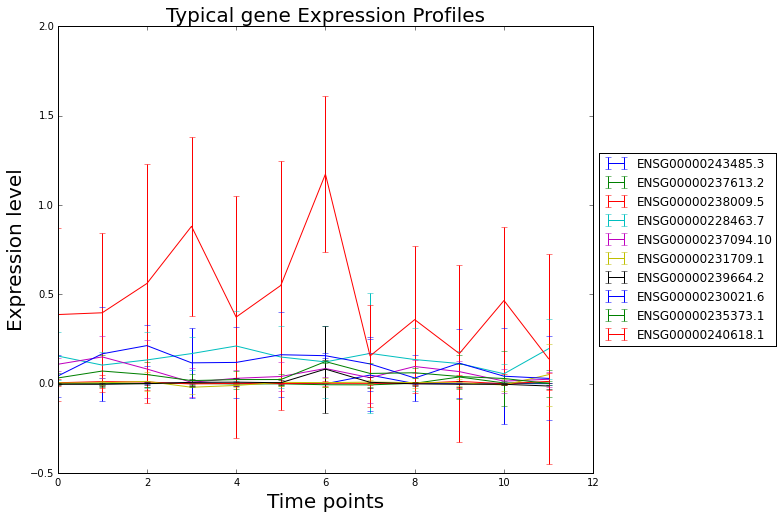

[('ENSG00000231868.1', 'ENSG00000237613.2'), ('ENSG00000237938.4', 'ENSG00000271732.1'), ('ENSG00000204362.5', 'ENSG00000236648.1')]
ENSG00000231868.1 ENSG00000237613.2
ENSG00000237938.4 ENSG00000271732.1
ENSG00000204362.5 ENSG00000236648.1


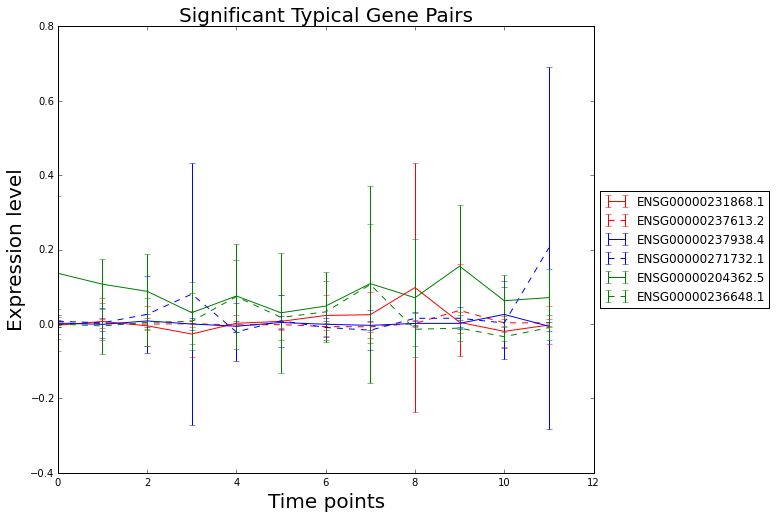

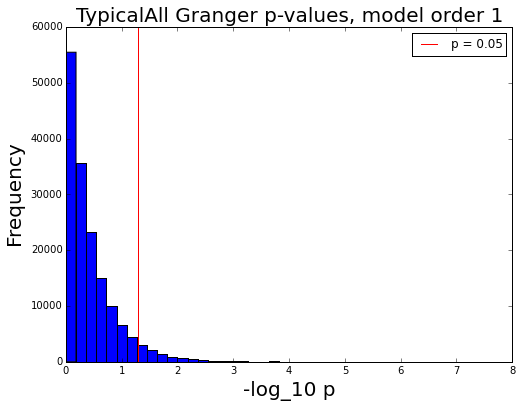

587


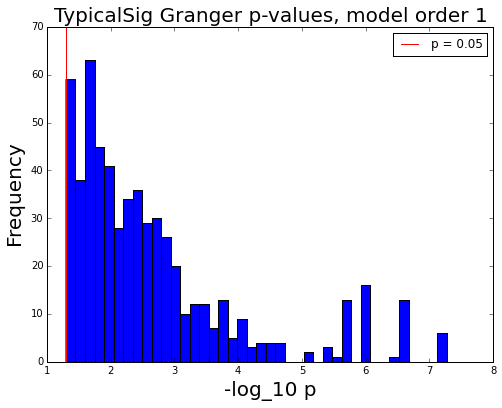

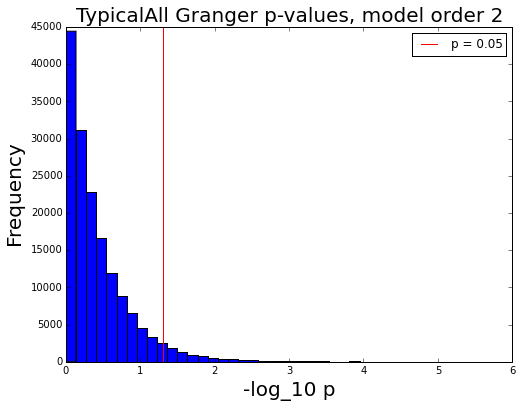

587


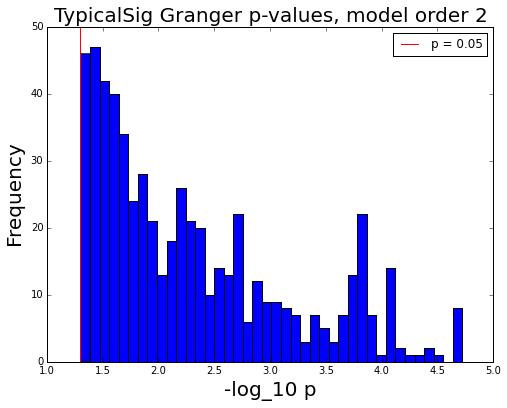

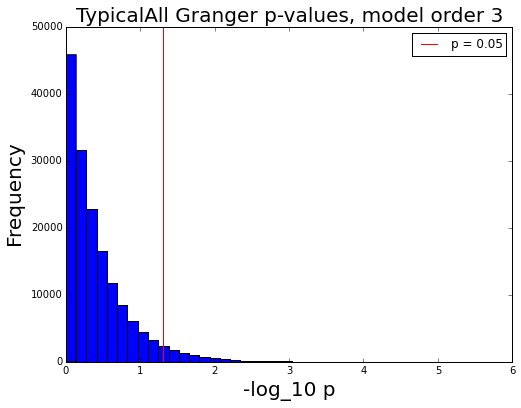

587


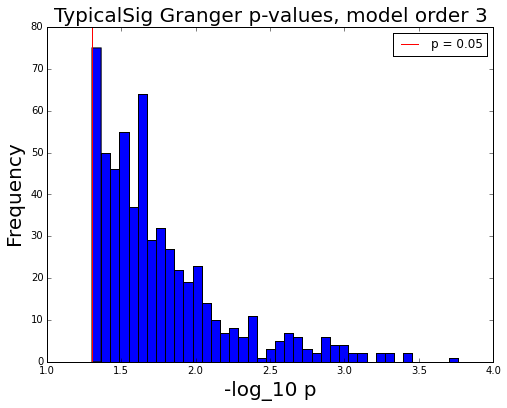

In [8]:
gene_name = "Typical"
typical_genes = found_genes[0:10]

gtm.plot_genes(data, typical_genes, title= gene_name + " gene Expression Profiles")


# Plot some of the matched, significant pairs
plot_sig_matr = all_sig_matr & (p_matr < 0.001)
gene_pairs = gtm.get_sig_gene_pairs(plot_sig_matr, found_genes)
plot_gene_pairs = gene_pairs[1:3] + gene_pairs[4:5]
print plot_gene_pairs
gtm.plot_gene_pairs(data, plot_gene_pairs, title="Significant " +gene_name + " Gene Pairs")

# Plot the p-matrix

for model_order, p_matr in zip(model_orders, p_matr_dict[gene_name]):
    all_pvalues = p_matr.flatten()

    plt.figure(figsize=(8,6))
    plt.hist(-1 * np.log10(all_pvalues), bins=40)
    plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
    plt.xlabel("-log_10 p", fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.legend()
    plt.title(gene_name + "All Granger p-values, model order " + str(model_order), fontsize=20)
    plt.show()    
    
    
    
    sig_pvalues = p_matr[np.where(all_sig_matr)]
    print len(sig_pvalues)


    plt.figure(figsize=(8,6))
    plt.hist(-1 * np.log10(sig_pvalues), bins=40)
    plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
    plt.xlabel("-log_10 p", fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.legend()
    plt.title(gene_name + "Sig Granger p-values, model order " + str(model_order), fontsize=20)
    plt.show()


## As baseline, see how many causal genes are in random

In [9]:
num_genes = 400
gene_name = "Random"

genes = data['gene'][:num_genes].values


found_genes, geneTS = gtm.get_gene_TS(data, genes)

seeds = range(1)

sig_tuples = []
rand_sig_pvalues = []

for seed in seeds:
    np.random.seed(seed)
    rand_geneTS = gtm.randomize_geneTS(geneTS)



    threshold = 0.05

    p_matr_list = []
    sig_matr_list = []

        
    for p in model_orders:
    

        %time p_matr = ct.pairwise_granger_causality_all(geneTS, model_order=p, use_processes=True, procnum=16)

        p_matr_list.append(p_matr)

        sig_matr = p_matr < threshold

        sig_matr_list.append(sig_matr)

        print "For model order ", p, "# significant:", len(np.where(sig_matr)[0])
    
    p_matr_dict[gene_name] = p_matr_list[:]
    sig_matr_dict[gene_name] = sig_matr_list[:]
    
    all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

    print "Total number of significant pairs ", all_sig_num + not_sig_num
    print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)

    sig_tuples.append([all_sig_num + not_sig_num, all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)])
    
    rand_sig_pvalues.extend(p_matr[np.where(all_sig_matr)])


zipped_tuples = zip(*sig_tuples)

total_sigs, all_sigs, all_sigs_ratios = zipped_tuples[0], zipped_tuples[1], zipped_tuples[2]

print "Total significant", total_sigs
print "All significant", all_sigs
print "All significant ratios", all_sigs_ratios
    # print this out in an understandable format: write causes, effects, and p-values to a file?

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(399, 389), (399, 390), (399, 391), (399, 392), (399, 393), (399, 394), (399, 395), (399, 396), (399, 397), (399, 398)]
time to partition inputs  0.00275206565857
Time to prepare function args  0.000108003616333
Pool initialized at  18:01:58
number of processes:  16
Mapping begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Mapping finished at  18:03:06
Time to get return values  68.4613239765
CPU times: user 522 ms, sys: 214 ms, total: 736 ms
Wall time: 1min 8s
For model order  1 # significant: 8969
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(399, 389), (399, 390), (399, 391), (399, 392), (399, 393), (399, 394), (399, 395), (399, 396), (399, 397), (399, 398)]
time to partition inputs  0.00309181213379
Time to prepare function args  9.29832458496e-05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Pool initialized at  18:03:07
number of processes:  16
Mapping begun at  18:03:07


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Mapping finished at  18:04:14
Time to get return values  67.9668059349
CPU times: user 375 ms, sys: 173 ms, total: 548 ms
Wall time: 1min 8s
For model order  2 # significant: 8363
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(399, 389), (399, 390), (399, 391), (399, 392), (399, 393), (399, 394), (399, 395), (399, 396), (399, 397), (399, 398)]
time to partition inputs  0.0032069683075
Time to prepare function args  0.000110149383545
Pool initialized at  18:04:15
number of processes:  16
Mapping begun at  18:04:15


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Mapping finished at  18:05:24
Time to get return values  68.9312369823
CPU times: user 396 ms, sys: 165 ms, total: 560 ms
Wall time: 1min 9s
For model order  3 # significant: 7946
Total number of significant pairs  20517
Pairs significant across all matrices  587 0.0286104206268
Total significant (20517,)
All significant (587,)
All significant ratios (0.02861042062679729,)


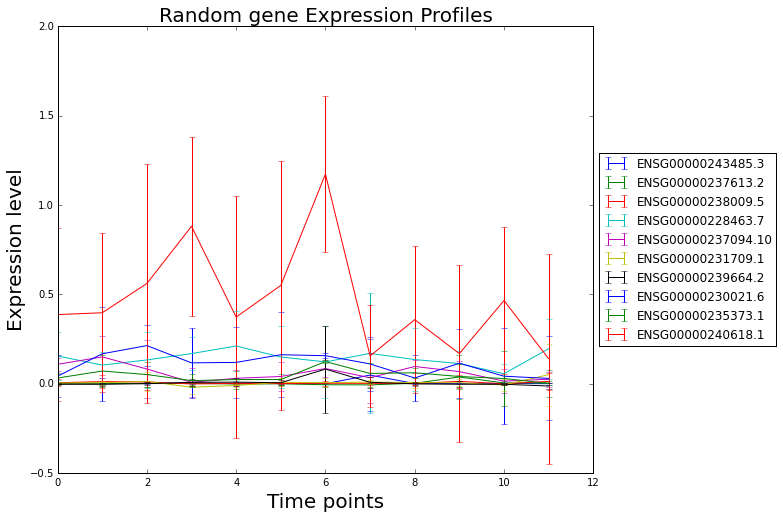

[('ENSG00000230615.5', 'ENSG00000237188.3')]
ENSG00000230615.5 ENSG00000237188.3


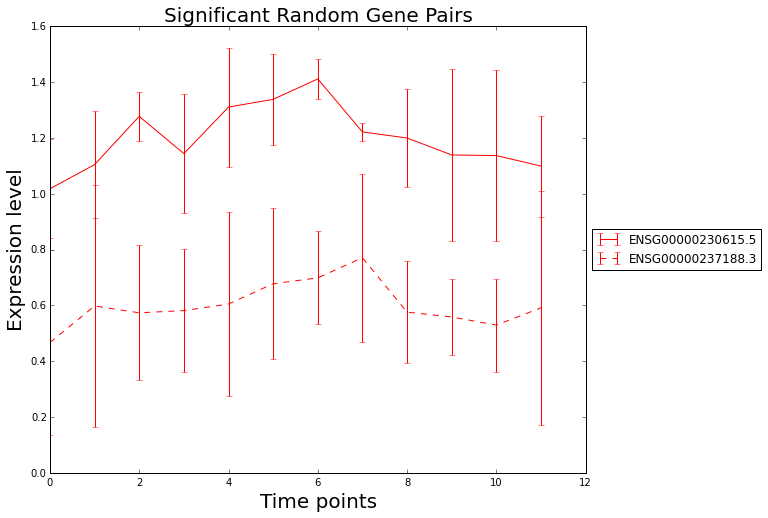

587


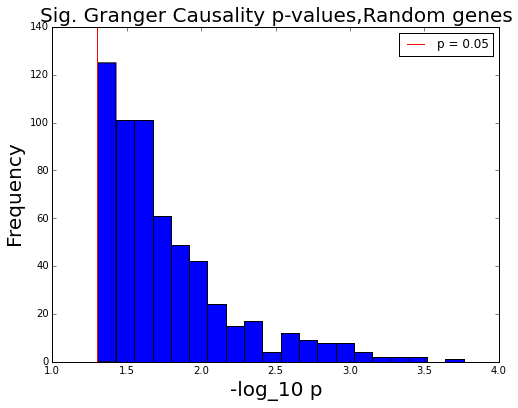

In [10]:
gene_name = "Random"
typical_genes = found_genes[0:10]

gtm.plot_genes(data, typical_genes, title= gene_name + " gene Expression Profiles")


# Plot some of the matched, significant pairs
plot_sig_matr = all_sig_matr & (p_matr < 0.0003)
gene_pairs = gtm.get_sig_gene_pairs(plot_sig_matr, found_genes)
plot_gene_pairs = gene_pairs[0:3]
print plot_gene_pairs
gtm.plot_gene_pairs(data, plot_gene_pairs, title="Significant " +gene_name + " Gene Pairs")

# Plot the p-matrix


sig_pvalues = p_matr[np.where(all_sig_matr)]
print len(sig_pvalues)


plt.figure(figsize=(8,6))
plt.hist(-1 * np.log10(sig_pvalues), bins=20)
plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
plt.xlabel("-log_10 p", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.legend()
plt.title("Sig. Granger Causality p-values," + gene_name + " genes", fontsize=20)
plt.show()


all_rand_null_pvalues = p_matr.flatten()





# Get the variance of the timepoints and timepoints' fold changes

In [14]:
for name, data in zip(names, datas):
    print name
    print data[keys].describe()

NCRNA_TPM
               t00          t05          t1_          t2_          t3_  \
count  8141.000000  8141.000000  8141.000000  8141.000000  8141.000000   
mean      0.374173     0.372149     0.370078     0.361485     0.361332   
std       0.646110     0.649867     0.646704     0.643174     0.645214   
min      -0.096345    -0.123647    -0.157804    -0.307961    -0.224479   
25%       0.005385     0.001911     0.003457     0.004465     0.003002   
50%       0.086067     0.087054     0.082678     0.075138     0.078944   
75%       0.446855     0.448734     0.442504     0.417011     0.418876   
max       6.430718     6.204473     5.701680     6.105167     6.270800   

               t4_          t5_          t6_          t7_          t8_  \
count  8141.000000  8141.000000  8141.000000  8141.000000  8141.000000   
mean      0.363938     0.361931     0.353692     0.351598     0.349269   
std       0.640396     0.645585     0.644294     0.631352     0.629513   
min      -0.107400    -0.18

# Look at fold keys

In [15]:
data[fold_keys].describe()

t00-t05 fold  t05-t1_ fold  t1_-t2_ fold  t2_-t3_ fold  t3_-t4_ fold  \
count   8141.000000   8141.000000   8141.000000   8141.000000   8141.000000   
mean       1.646604     -0.017602      1.892243     -3.497193     11.034148   
std       43.811525     46.897580    682.432394    360.960470    866.113120   
min    -1852.652175  -1595.319268 -40931.151157 -32201.668665   -382.252053   
25%        0.277192     -0.052441      0.104482      0.111434     -0.044136   
50%        0.934498      0.819037      0.829957      0.829080      0.813087   
75%        1.268593      1.243433      1.170517      1.194849      1.175141   
max     2372.316228   2124.092809  45588.441903   1217.297037  78108.053862   

       t4_-t5_ fold  t5_-t6_ fold  t6_-t7_ fold  t7_-t8_ fold  t8_-t10_ fold  \
count   8141.000000   8141.000000   8141.000000   8141.000000    8141.000000   
mean       0.994475      0.323694      0.504401     45.940666       0.788024   
std       35.134966     42.779504     21.977876    788.895924      25.981032   
min    -2242.822955  -1961.356270   -992.493384  -1557.412957    -536.110057   
25%        0.340614      0.435177     -0.144574      0.352938       0.131088   
50%        0.949058      0.929283      0.689787      0.958403       0.882174   
75%        1.547910      1.301953      1.115730      1.419883       1.303280   
max      576.906929   1530.951676    524.498744  13964.379785    1510.438368   

       t10_-t12_ fold  
count     8141.000000  
mean         1.524481  
std        114.380288  
min      -5295.614906  
25%          0.093570  
50%          0.914751  
75%          1.405406  
max       7857.773144

# get the genes with the highest fold changes. Top 0.1% at each point
# apply granger then

In [16]:

change_indices = (data[fold_keys] > data[fold_keys].quantile(.999)).T.any() | (data[fold_keys] < data[fold_keys].quantile(.001)).T.any() 
change_genes = data['gene'][change_indices]

found_genes, geneTS = gtm.get_gene_TS(data, change_genes)
print len(found_genes)

196


[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(195, 185), (195, 186), (195, 187), (195, 188), (195, 189), (195, 190), (195, 191), (195, 192), (195, 193), (195, 194)]
time to partition inputs  0.000503063201904
Time to prepare function args  8.58306884766e-05
Process  17782 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17783 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17784 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Pool initialized at  17:56:56
Mapping begun at  17:56:56
Process  17785 number  3 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17786 number  4 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17788 number  6 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17787 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17790 number  8 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17789 number  7 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17791 number  9 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17792 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17795 number  13 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17793 number  11 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17794 number  12 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17796 number  14 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17797 number  15 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17782 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:13
Process  17787 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Process  17792 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Process  17797 number  15 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Process  17784 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Process  17790 number  8 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Process  17783 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Process  17791 number  9 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Proces

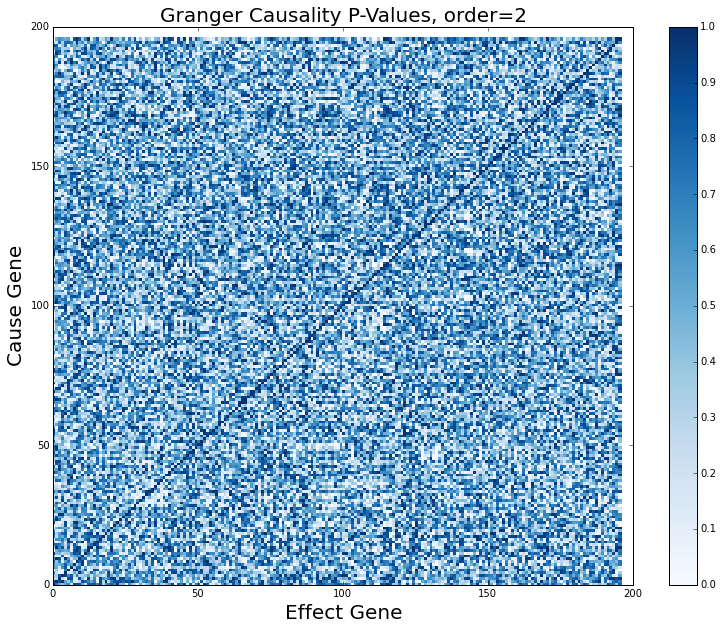

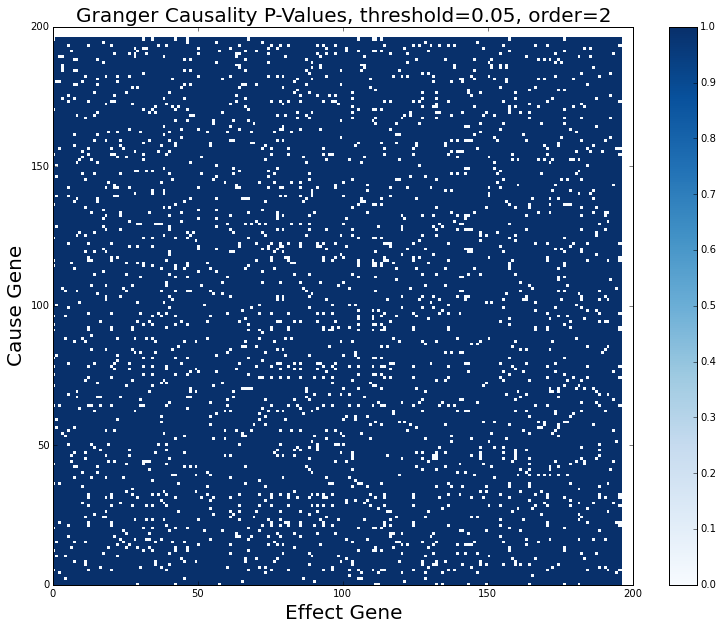

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(195, 185), (195, 186), (195, 187), (195, 188), (195, 189), (195, 190), (195, 191), (195, 192), (195, 193), (195, 194)]
time to partition inputs  0.000416994094849
Time to prepare function args  7.60555267334e-05
Process  17799 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17800 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17802 number  3 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17801 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17805 number  6 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17804 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17803 number  4 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17806 number  7 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17809 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17807 number  8 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17811 number  12 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Pool initialized at  17:57:19
Mapping begun at  17:57:19
Process  17808 number  9 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17810 number  11 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17812 number  13 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17813 number  14 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17814 number  15 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17814 number  15 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17808 number  9 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17801 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17800 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17811 number  12 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17804 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17805 number  6 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17799 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Proces

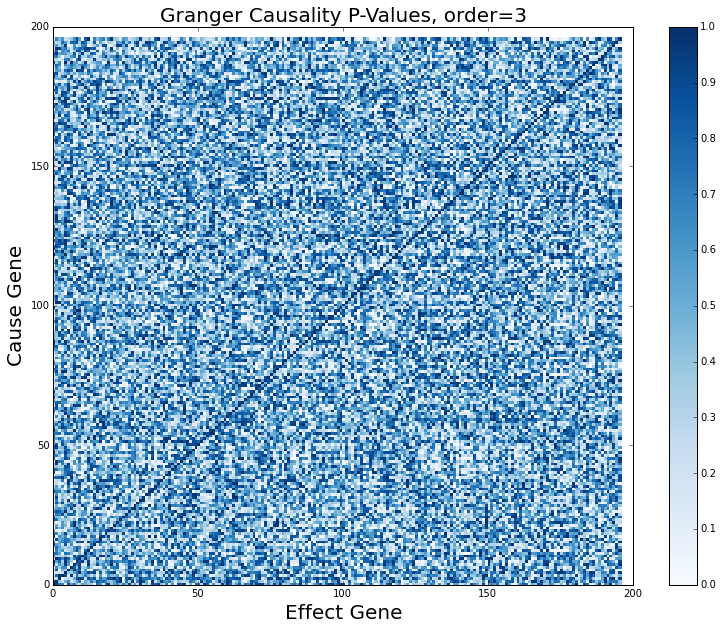

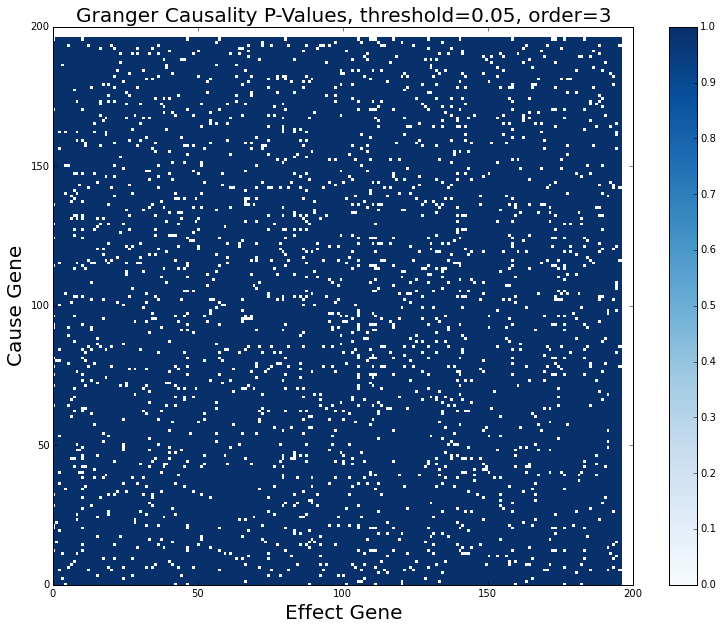

Total number of significant pairs  3762
Pairs significant across all matrices  463 0.123072833599


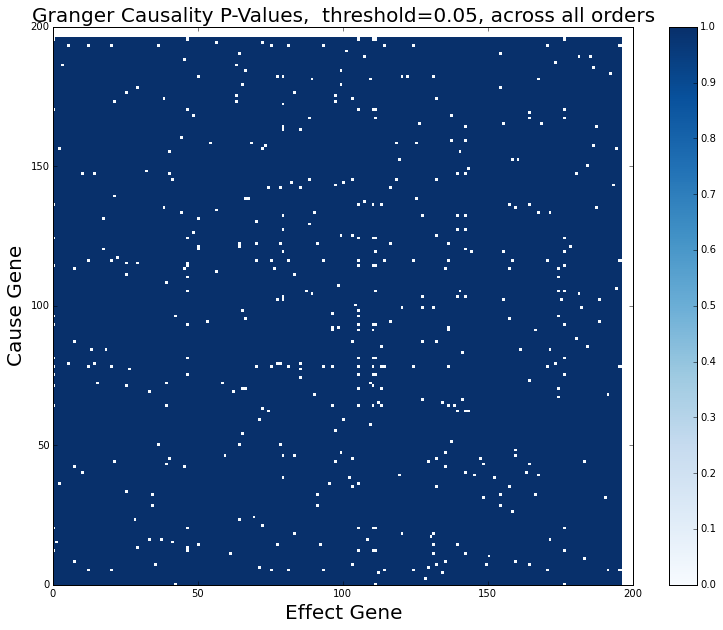

In [17]:
threshold = 0.05

sig_matr_list = []



for p in range(2,4):


    %time p_matr = ct.pairwise_granger_causality_all(geneTS, model_order=p, use_processes=True, procnum=16)

    sig_matr = p_matr < threshold
    
    sig_matr_list.append(sig_matr)
    
    print "P-values at p = ", p
    print p_matr
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(p_matr , cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

    
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(1 - sig_matr, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, threshold=" + str(threshold) + ", order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

print "Total number of significant pairs ", all_sig_num + not_sig_num
print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)


plt.figure(figsize=(13,10))
heatmap = plt.pcolor(1 - all_sig_matr, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Granger Causality P-Values,  threshold=" + str(threshold) + ", across all orders", fontsize=20)
plt.xlabel("Effect Gene", fontsize=20)
plt.ylabel("Cause Gene", fontsize=20)
plt.show()

# print this out in an understandable format: write causes, effects, and p-values to a file?

# get sig p-values

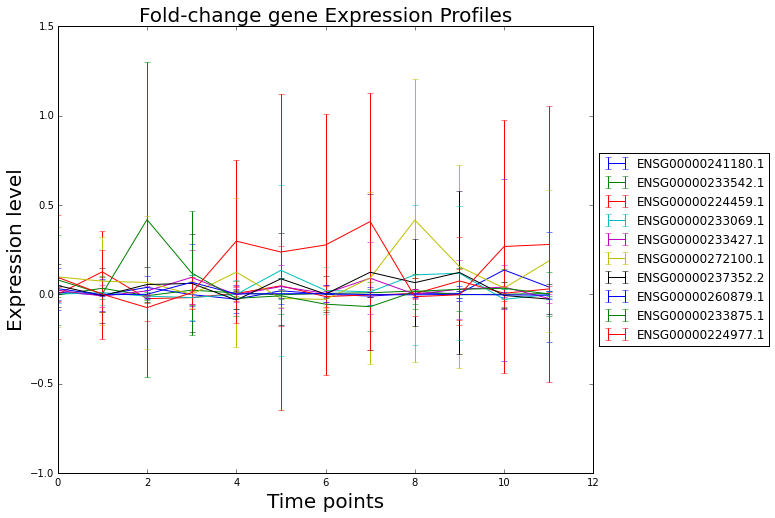

[('ENSG00000229401.1', 'ENSG00000248605.4'), ('ENSG00000271931.1', 'ENSG00000228100.1')]
ENSG00000229401.1 ENSG00000248605.4
ENSG00000271931.1 ENSG00000228100.1


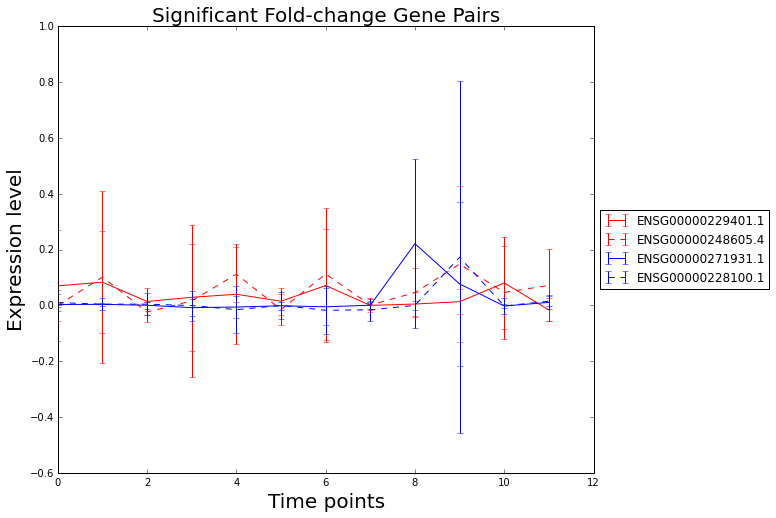

463


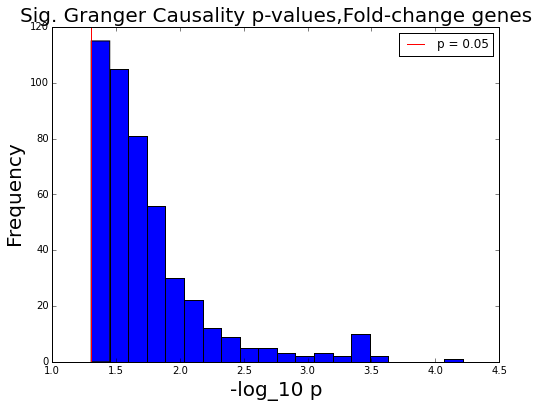

In [26]:
gene_name = "Fold-change"
typical_genes = found_genes[0:10]

gtm.plot_genes(data, typical_genes, title= gene_name + " gene Expression Profiles")


# Plot some of the matched, significant pairs
plot_sig_matr = all_sig_matr & (p_matr < 0.001)
gene_pairs = gtm.get_sig_gene_pairs(plot_sig_matr, found_genes)
plot_gene_pairs = gene_pairs[0:1] + gene_pairs[2:3]
print plot_gene_pairs
gtm.plot_gene_pairs(data, plot_gene_pairs, title="Significant " +gene_name + " Gene Pairs")

# Plot the p-matrix


sig_pvalues = p_matr[np.where(all_sig_matr)]
print len(sig_pvalues)


plt.figure(figsize=(8,6))
plt.hist(-1 * np.log10(sig_pvalues), bins=20)
plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
plt.xlabel("-log_10 p", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.legend()
plt.title("Sig. Granger Causality p-values," + gene_name + " genes", fontsize=20)
plt.show()

# Multi-fold change genes

In [ ]:
data[fold_keys].describe()

In [27]:
import os
most_change_indices = (data[fold_keys] > data[fold_keys].quantile(.90)).T.sum() + (data[fold_keys] < data[fold_keys].quantile(.1)).T.sum()
print (data[fold_keys] > data[fold_keys].quantile(.90)).T.sum().describe()
print (data[fold_keys] < data[fold_keys].quantile(.1)).T.sum().describe()
print len(np.where(most_change_indices > 7)[0])
os.system("say 'We're finished here'")

count    8141.000000
mean        1.099865
std         1.094537
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
dtype: float64
count    8141.000000
mean        1.099865
std         1.340899
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
dtype: float64
0


512

In [28]:
most_change_genes = data['gene'][most_change_indices > 5]

found_genes, geneTS = gtm.get_gene_TS(data, most_change_genes)
print len(found_genes)

277


[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(276, 266), (276, 267), (276, 268), (276, 269), (276, 270), (276, 271), (276, 272), (276, 273), (276, 274), (276, 275)]
time to partition inputs  0.00124096870422
Time to prepare function args  0.000171899795532
Process  17830 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17831 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17832 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58
Process  17833 number  3 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58
Pool initialized at  18:01:58
Mapping begun at  18:01:58
Process  17834 number  4 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17836 number  6 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58
Process  17835 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17837 number  7 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58
Process  17838 number  8 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17839 number  9 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17840 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17841 number  11 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58
Process  17842 number  12 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58
Process  17843 number  13 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17844 number  14 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17845 number  15 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17833 number  3 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17837 number  7 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17835 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17831 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17830 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17834 number  4 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17840 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17838 number  8 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process

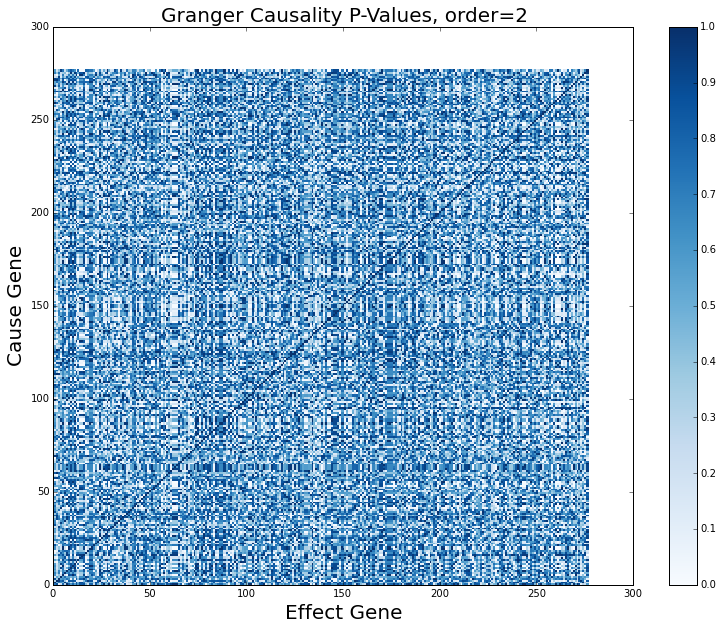

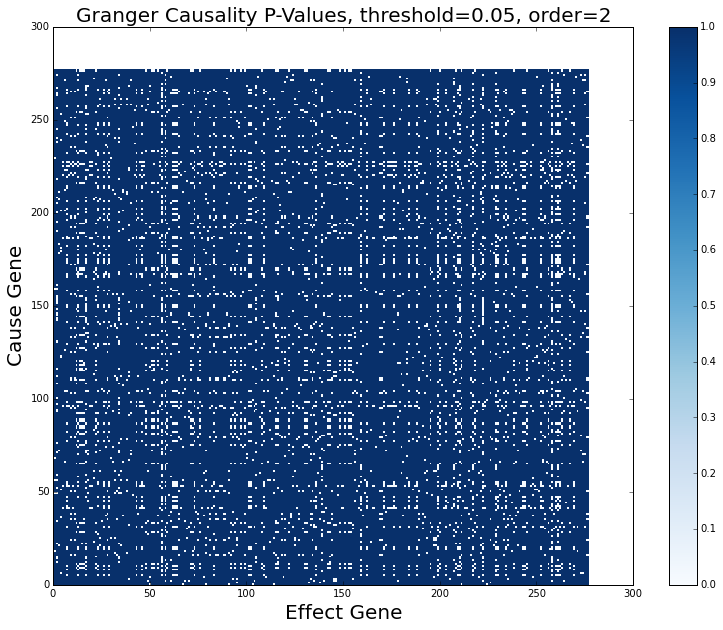

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(276, 266), (276, 267), (276, 268), (276, 269), (276, 270), (276, 271), (276, 272), (276, 273), (276, 274), (276, 275)]
time to partition inputs  0.000994920730591
Time to prepare function args  7.00950622559e-05
Process  17847 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42
Process  17848 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Pool initialized at  18:02:42
Mapping begun at  18:02:42
Process  17849 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17850 number  3 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17851 number  4 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17853 number  6 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42
Process  17852 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42
Process  17854 number  7 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17855 number  8 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17856 number  9 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17858 number  11 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42
Process  17857 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42
Process  17859 number  12 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17860 number  13 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17861 number  14 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17862 number  15 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17847 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:17
Process  17852 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Process  17851 number  4 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Process  17849 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Process  17857 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Process  17854 number  7 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Process  17850 number  3 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Process  17861 number  14 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Proces

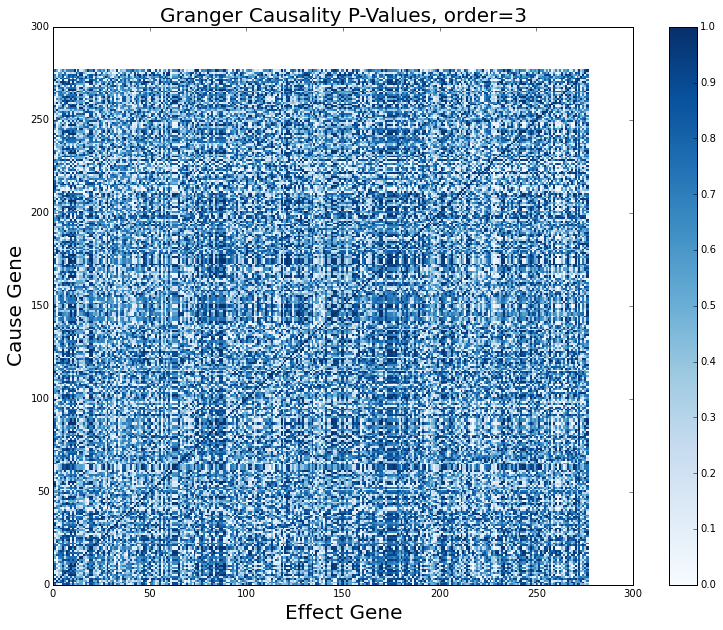

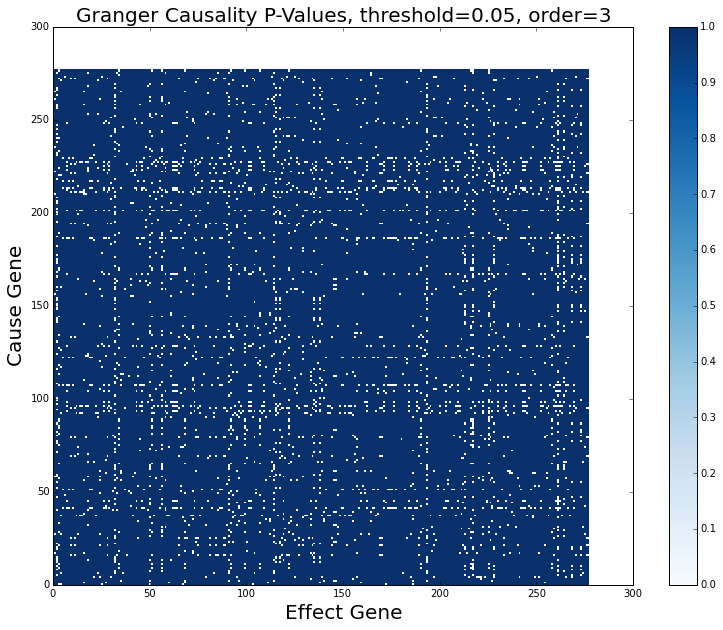

Total number of significant pairs  8113
Pairs significant across all matrices  1074 0.132380130655


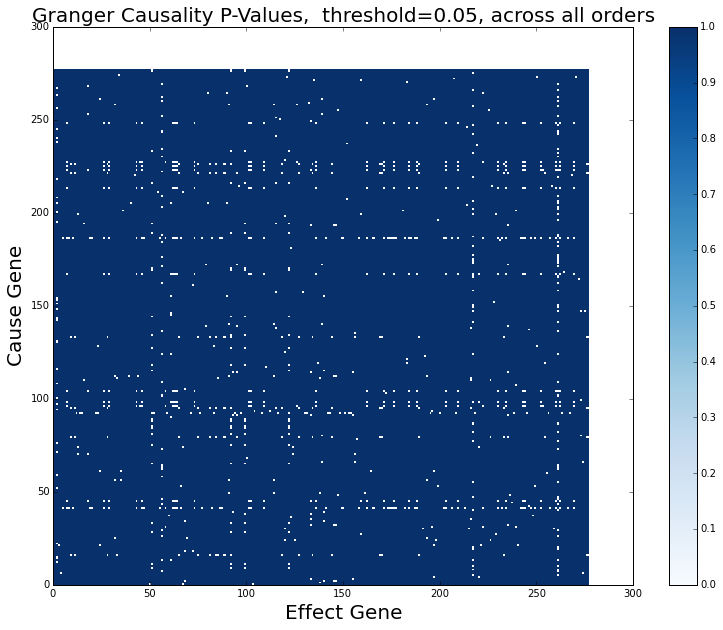

In [29]:
threshold = 0.05

sig_matr_list = []



for p in range(2,4):


    %time p_matr = ct.pairwise_granger_causality_all(geneTS, model_order=p, use_processes=True, procnum=16)

    sig_matr = p_matr < threshold
    
    sig_matr_list.append(sig_matr)
    
    print "P-values at p = ", p
    print p_matr
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(p_matr , cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

    
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(1 - sig_matr, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, threshold=" + str(threshold) + ", order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

print "Total number of significant pairs ", all_sig_num + not_sig_num
print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)


plt.figure(figsize=(13,10))
heatmap = plt.pcolor(1 - all_sig_matr, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Granger Causality P-Values,  threshold=" + str(threshold) + ", across all orders", fontsize=20)
plt.xlabel("Effect Gene", fontsize=20)
plt.ylabel("Cause Gene", fontsize=20)
plt.show()

# print this out in an understandable format: write causes, effects, and p-values to a file?

# get sig p-values

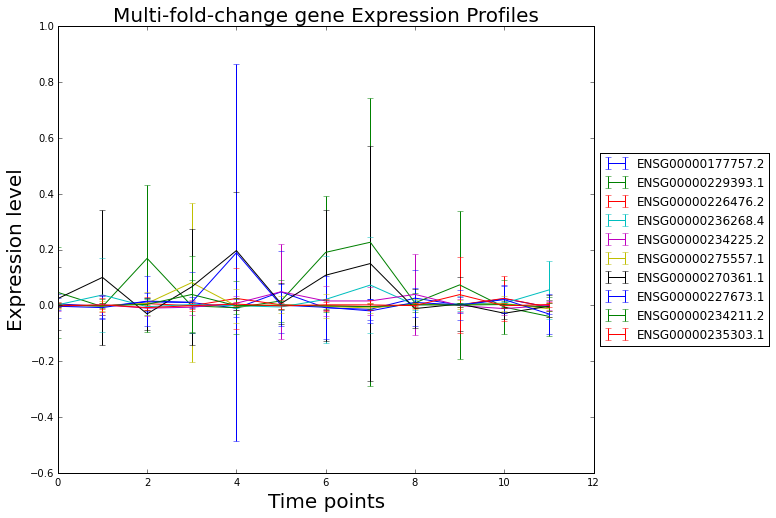

[('ENSG00000243799.1', 'ENSG00000249152.1'), ('ENSG00000238324.1', 'ENSG00000234707.2')]
ENSG00000243799.1 ENSG00000249152.1
ENSG00000238324.1 ENSG00000234707.2


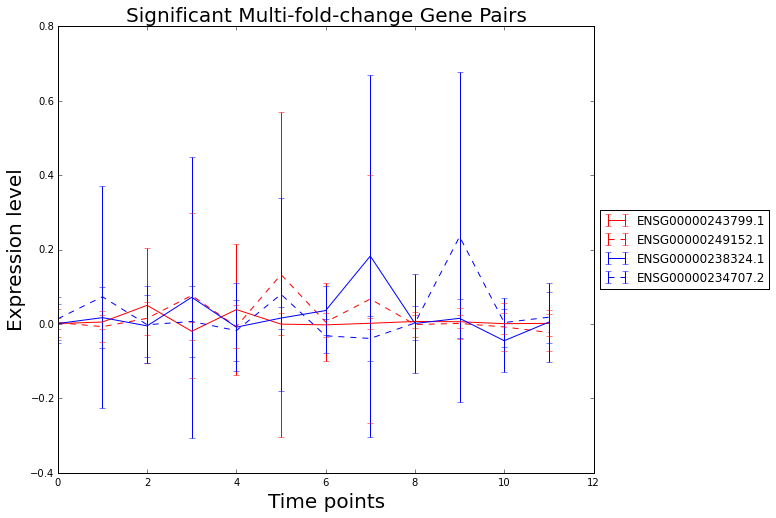

1074


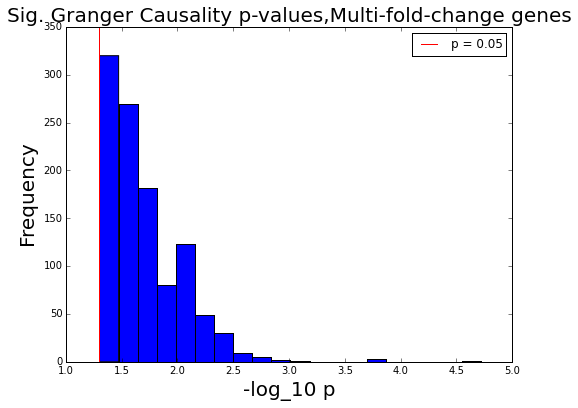

In [33]:
gene_name = "Multi-fold-change"
typical_genes = found_genes[0:10]

gtm.plot_genes(data, typical_genes, title= gene_name + " gene Expression Profiles")


# Plot some of the matched, significant pairs
plot_sig_matr = all_sig_matr & (p_matr < 0.0005)
gene_pairs = gtm.get_sig_gene_pairs(plot_sig_matr, found_genes)
plot_gene_pairs = gene_pairs[0:2]
print plot_gene_pairs
gtm.plot_gene_pairs(data, plot_gene_pairs, title="Significant " +gene_name + " Gene Pairs")

# Plot the p-matrix


sig_pvalues = p_matr[np.where(all_sig_matr)]
print len(sig_pvalues)


plt.figure(figsize=(8,6))
plt.hist(-1 * np.log10(sig_pvalues), bins=20)
plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
plt.xlabel("-log_10 p", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.legend()
plt.title("Sig. Granger Causality p-values," + gene_name + " genes", fontsize=20)
plt.show()

# Plot Basic Distributions
# Plot a few important gene TSs as well

In [ ]:
reload(gtm)

typical_genes = data['gene'][0:10]

gtm.plot_genes(data, typical_genes, title="Typical gene Expression Profiles")





change_indices = (data[fold_keys] > data[fold_keys].quantile(.999)).T.any() | (data[fold_keys] < data[fold_keys].quantile(.001)).T.any() 
change_genes = data['gene'][change_indices]

found_genes, geneTS = gtm.get_gene_TS(data, change_genes)
print len(found_genes)

plot_genes = found_genes[0:10]

gtm.plot_genes(data, plot_genes, title="Fold-Change " + name + " expression time series")


most_change_indices = (data[fold_keys] > data[fold_keys].quantile(.90)).T.sum() + (data[fold_keys] < data[fold_keys].quantile(.1)).T.sum()
most_change_threshold = 5
most_change_genes = data['gene'][most_change_indices > most_change_threshold]

plot_genes = most_change_genes[0:10]

gtm.plot_genes(data, plot_genes, title="Multi-Fold-Change " + name + " expression time series")



In [ ]:
rand_dict = {}
for i in range(len(keys)):
    rand_dict[keys[i]] = rand_geneTS[:, i]
    

    
rand_df = pd.DataFrame(rand_dict)

rand_df['gene'] = data['gene'][0:400]
plot_genes = rand_df['gene'][0:10]

gtm.plot_genes(rand_df, plot_genes, title="Random " + name + " expression time series")



# Plot some of the sitgnificant time series

In [14]:
import numpy as np
z = np.array([[1,0,0], [0,0, 1]])
d = np.array(['a', 'b', 'c'])
rows, cols = np.where(z)
drows, dcols = [d[row] for row in rows], [d[col] for col in cols]
pairs = zip(drows, dcols)

In [15]:
print pairs

[('a', 'a'), ('b', 'c')]


# Apply to Proteins

In [20]:
# load the data

import pandas as pd
import numpy as np
import CausalTests as ct
import multi_testing as mt
import geneTSmunging as gtm
import matplotlib.pyplot as plt
%matplotlib inline

filenames = ["../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.protein_coding.txt"]
names = ["Protein_TPM"]
keys = ["t00", "t05", "t1_", "t2_", "t3_", "t4_", "t5_", "t6_", "t7_", "t8_", "t10_", "t12_"]
fold_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    fold_key = key1 + "-" + key2 + " fold"
    fold_keys.append(fold_key)

datas = []
for filename in filenames:
    datas.append(gtm.load_file_and_avg(filename))
data = datas[0]
name = names[0]
print name

['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4']
['t05_rep1', 't05_rep2', 't05_rep3', 't05_rep4']
['t1_rep1', 't1_rep2', 't1_rep3', 't1_rep4']
['t2_rep1', 't2_rep2', 't2_rep3', 't2_rep4']
['t3_rep1', 't3_rep2', 't3_rep3', 't3_rep4']
['t4_rep1', 't4_rep2', 't4_rep3', 't4_rep4']
['t5_rep2', 't5_rep3', 't5_rep4']
['t6_rep2', 't6_rep3', 't6_rep4']
['t7_rep1', 't7_rep2', 't7_rep3', 't7_rep4']
['t8_rep1', 't8_rep2', 't8_rep3', 't8_rep4']
['t10_rep1', 't10_rep2', 't10_rep3', 't10_rep4']
['t12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']
t00 has 4 data points
t05 has 4 data points
t1_ has 4 data points
t2_ has 4 data points
t3_ has 4 data points
t4_ has 4 data points
t5_ has 3 data points
t6_ has 3 data points
t7_ has 4 data points
t8_ has 4 data points
t10_ has 4 data points
t12_ has 4 data points
Protein_TPM


[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(399, 389), (399, 390), (399, 391), (399, 392), (399, 393), (399, 394), (399, 395), (399, 396), (399, 397), (399, 398)]
time to partition inputs  0.00330209732056
Time to prepare function args  0.000185966491699
Process  16870 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:22
Process  16871 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:22


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Pool initialized at  15:30:22
Mapping begun at  15:30:22


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16872 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:22
Process  16873 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:22


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16874 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:22


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16875 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:22
Process  16877 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:22
Process  16876 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:22


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  16879 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:22
Process  16878 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:22


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  16880 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:23
Process  16881 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:23


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16882 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:23


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16883 number  13 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:23


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16884 number  14 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:23


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16885 number  15 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:30:23


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16870 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:31:40
Process  16876 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:31:40
Process  16871 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:31:40
Process  16873 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:31:41
Process  16877 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:31:41
Process  16874 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:31:41
Process  16880 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:31:41
Process  16878 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:31:41
Process

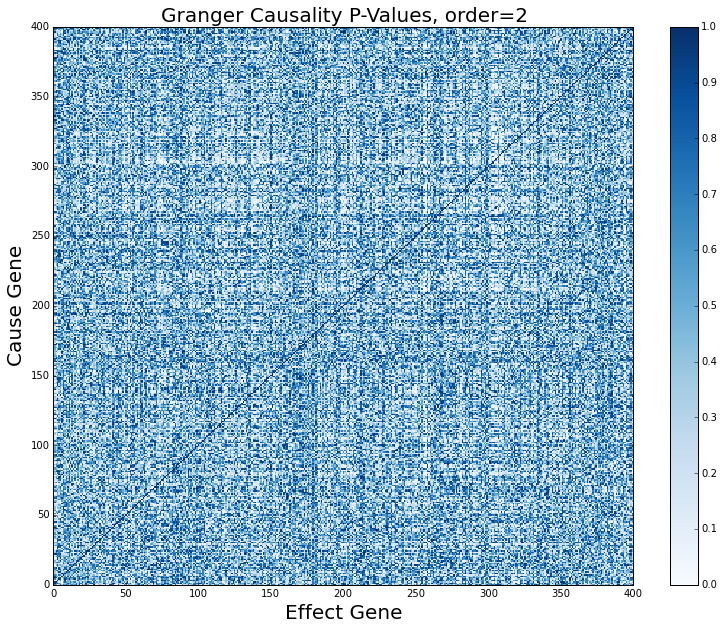

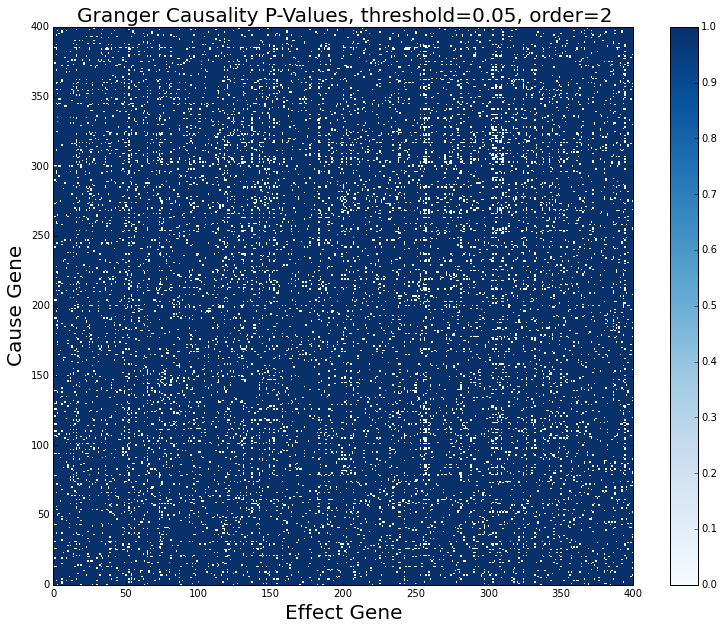

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(399, 389), (399, 390), (399, 391), (399, 392), (399, 393), (399, 394), (399, 395), (399, 396), (399, 397), (399, 398)]
time to partition inputs  0.00242614746094
Time to prepare function args  0.000310897827148
Process  16892 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:01


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Pool initialized at  15:32:01
Mapping begun at  15:32:01
Process  16893 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:01
Process  16894 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:01


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16895 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:01


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16896 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:01
Process  16897 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:01


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16898 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:02


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16899 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:02


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16901 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:02
Process  16900 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:02


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16902 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:02


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16903 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:02
Process  16904 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:02


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16905 number  13 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:02


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16906 number  14 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:02
Process  16907 number  15 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  15:32:02


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  16892 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:33:22
Process  16893 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:33:22
Process  16895 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:33:22
Process  16899 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:33:22
Process  16898 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:33:22
Process  16894 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:33:22
Process  16897 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:33:22
Process  16904 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  15:33:22
Process

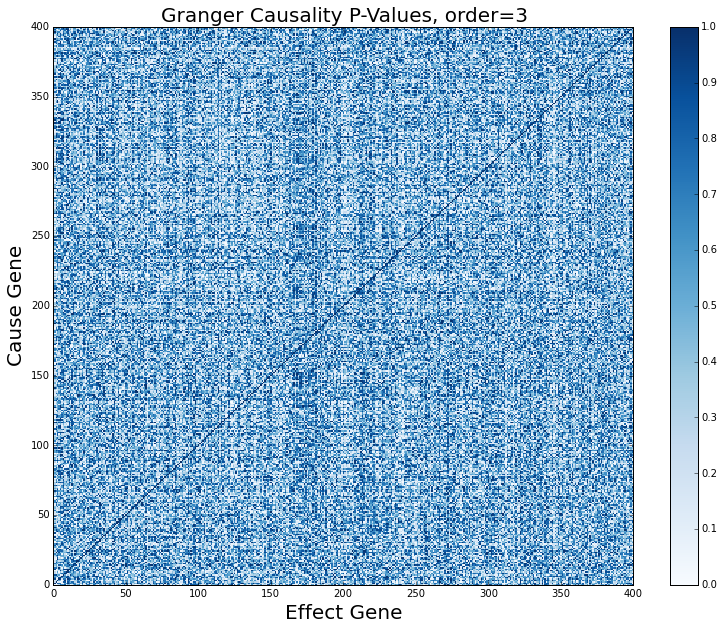

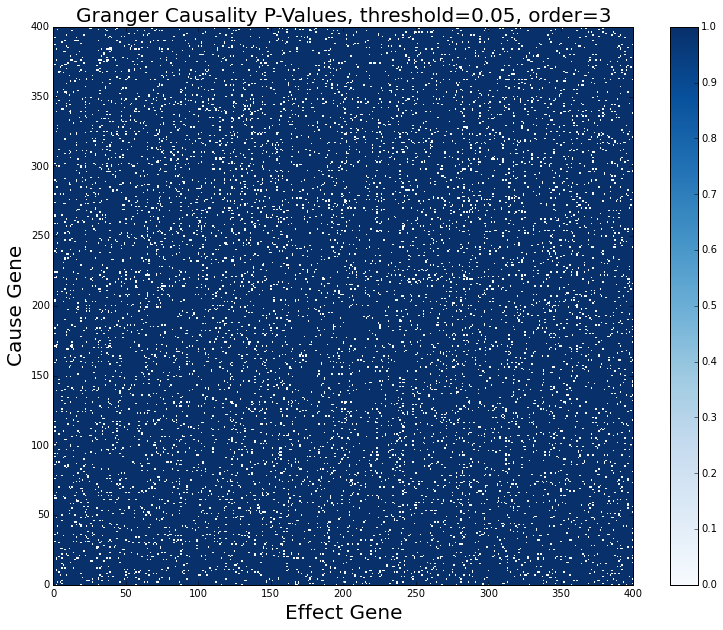

Total number of significant pairs  17632
Pairs significant across all matrices  1733 0.0982872050817


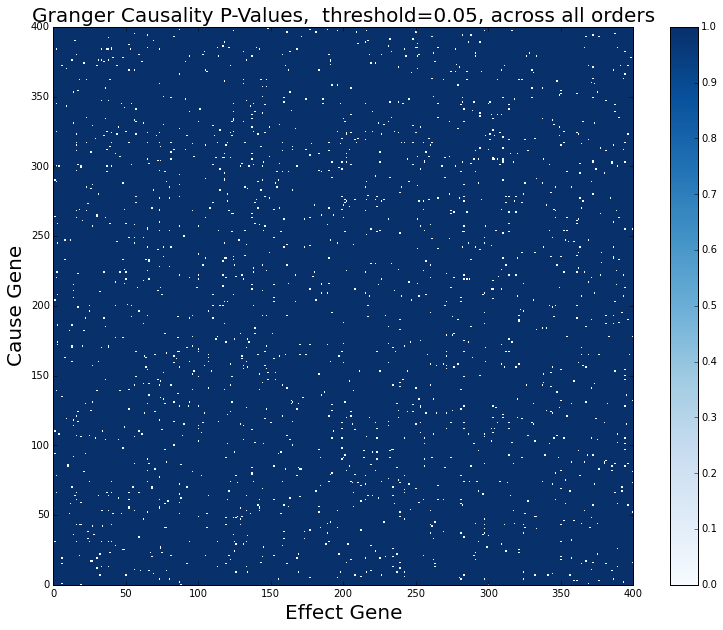

In [21]:
num_genes = 400
genes = data['gene'][:num_genes].values


found_genes, geneTS = gtm.get_gene_TS(data, genes)
threshold = 0.05

sig_matr_list = []



for p in range(2,4):


    %time p_matr = ct.pairwise_granger_causality_all(geneTS, model_order=p, use_processes=True, procnum=16)

    sig_matr = p_matr < threshold
    
    sig_matr_list.append(sig_matr)
    
    print "P-values at p = ", p
    print p_matr
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(p_matr , cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

    
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(1 - sig_matr, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, threshold=" + str(threshold) + ", order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

print "Total number of significant pairs ", all_sig_num + not_sig_num
print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)


plt.figure(figsize=(13,10))
heatmap = plt.pcolor(1 - all_sig_matr, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Granger Causality P-Values,  threshold=" + str(threshold) + ", across all orders", fontsize=20)
plt.xlabel("Effect Gene", fontsize=20)
plt.ylabel("Cause Gene", fontsize=20)
plt.show()

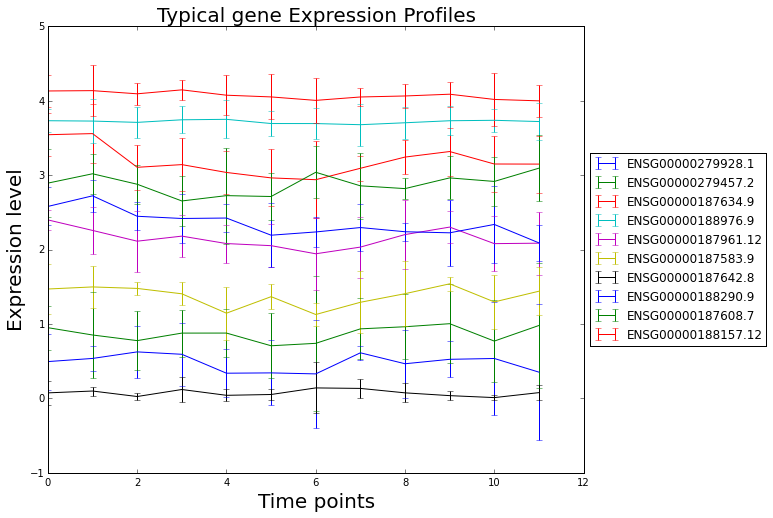

[('ENSG00000169885.8', 'ENSG00000116350.14'), ('ENSG00000275774.2', 'ENSG00000158022.6'), ('ENSG00000186510.10', 'ENSG00000157881.12'), ('ENSG00000253368.3', 'ENSG00000198793.11')]
ENSG00000169885.8 ENSG00000116350.14
ENSG00000275774.2 ENSG00000158022.6
ENSG00000186510.10 ENSG00000157881.12
ENSG00000253368.3 ENSG00000198793.11


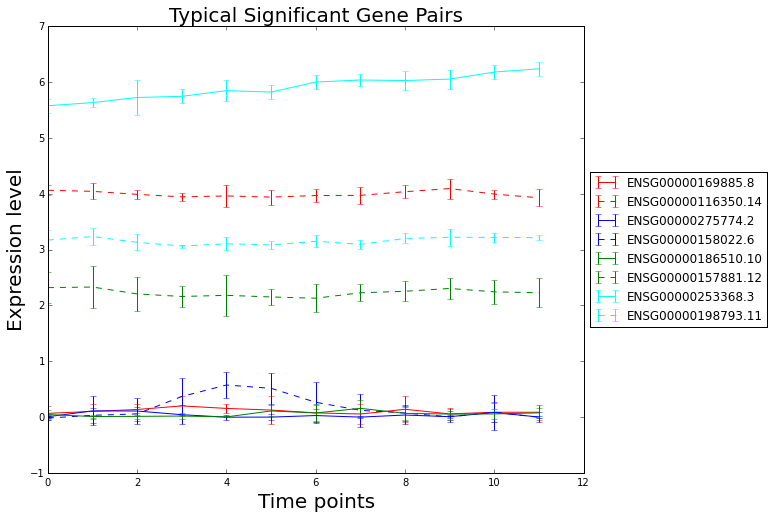

1733


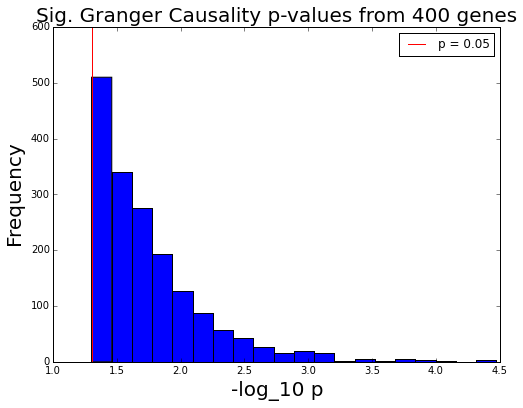

In [34]:
# Plot the typical genes
typical_genes = data['gene'][0:10]

gtm.plot_genes(data, typical_genes, title="Typical gene Expression Profiles")


# Plot some of the matched, significant pairs
plot_sig_matr = all_sig_matr & (p_matr < 0.0001)
gene_pairs = gtm.get_sig_gene_pairs(plot_sig_matr, found_genes)
plot_gene_pairs = gene_pairs[0:5]
print plot_gene_pairs
gtm.plot_gene_pairs(data, plot_gene_pairs, title="Typical Significant Gene Pairs")

# Plot the p-matrix

sig_pvalues = p_matr[np.where(all_sig_matr)]
print len(sig_pvalues)

plt.figure(figsize=(8,6))
plt.hist(-1 * np.log10(sig_pvalues), bins=20)
plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
plt.xlabel("-log_10 p", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.legend()
plt.title("Sig. Granger Causality p-values from " + str(num_genes) + " genes", fontsize=20)
plt.show()

## As baseline, see how many causal genes are in random

In [35]:


genes = data['gene'][:num_genes].values


found_genes, geneTS = gtm.get_gene_TS(data, genes)

seeds = range(3)

sig_tuples = []
rand_sig_pvalues = []

for seed in seeds:
    np.random.seed(seed)
    rand_geneTS = gtm.randomize_geneTS(geneTS)



    threshold = 0.05

    sig_matr_list = []

    for p in range(2,4):


        %time p_matr = ct.pairwise_granger_causality_all(rand_geneTS, model_order=p, use_processes=True, procnum=16)
        
        

        sig_matr = p_matr < threshold

        sig_matr_list.append(sig_matr)

    all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

    print "Total number of significant pairs ", all_sig_num + not_sig_num
    print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)

    sig_tuples.append([all_sig_num + not_sig_num, all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)])
    
    rand_sig_pvalues.extend(p_matr[np.where(all_sig_matr)])


zipped_tuples = zip(*sig_tuples)

total_sigs, all_sigs, all_sigs_ratios = zipped_tuples[0], zipped_tuples[1], zipped_tuples[2]

print "Total significant", total_sigs
print "All significant", all_sigs
print "All significant ratios", all_sigs_ratios
    # print this out in an understandable format: write causes, effects, and p-values to a file?

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(399, 389), (399, 390), (399, 391), (399, 392), (399, 393), (399, 394), (399, 395), (399, 396), (399, 397), (399, 398)]
time to partition inputs  0.00280690193176
Time to prepare function args  0.000157117843628
Process  17089 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:30
Process  17090 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:30
Process  17091 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:30


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17092 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:30
Process  17093 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:30


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17095 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:30
Process  17096 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:30
Pool initialized at  16:54:30
Mapping begun at  16:54:30


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17094 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:30


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17097 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17098 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17101 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31
Process  17100 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31
Process  17099 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17102 number  13 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31
Process  17103 number  14 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17104 number  15 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17105 number  16 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31
Process  17106 number  17 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17107 number  18 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17108 number  19 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17109 number  20 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17110 number  21 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31
Process  17111 number  22 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17112 number  23 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17113 number  24 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17114 number  25 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31
Process  17115 number  26 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:31


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17116 number  27 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:32


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17117 number  28 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:32


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17119 number  30 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:32
Process  17118 number  29 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:32


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17120 number  31 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:54:32


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17089 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:55:43
Process  17095 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:55:43
Process  17091 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:55:43
Process  17090 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:55:43
Process  17093 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:55:43
Process  17094 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:55:43
Process  17092 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:55:43
Process  17102 number  13 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:55:43
Process

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17125 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17124 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17126 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17127 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17128 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17129 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45
Process  17130 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Pool initialized at  16:55:45
Mapping begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17132 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45
Process  17131 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17133 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17134 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17135 number  13 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45
Process  17136 number  14 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17137 number  15 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17138 number  16 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17139 number  17 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17140 number  18 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45
Process  17141 number  19 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17142 number  20 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17143 number  21 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45
Process  17144 number  22 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17145 number  23 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:45


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17146 number  24 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:46


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17147 number  25 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:46


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17148 number  26 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:46


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17149 number  27 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:46


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17150 number  28 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:46
Process  17151 number  29 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:46


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17152 number  30 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:46


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17153 number  31 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:55:46


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17123 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:56:58
Process  17124 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:56:58
Process  17122 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:56:58
Process  17132 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:56:58
Process  17125 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:56:58
Process  17127 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:56:58
Process  17129 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:56:58
Process  17137 number  15 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:56:58
Process

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17159 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17161 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17162 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00
Process  17164 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00
Process  17163 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17166 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00
Process  17165 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Pool initialized at  16:56:59
Mapping begun at  16:56:59


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17167 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17168 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00
Process  17170 number  14 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17169 number  13 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00
Process  17172 number  16 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00
Process  17171 number  15 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00
Process  17176 number  20 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17175 number  19 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00
Process  17173 number  17 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17174 number  18 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17177 number  21 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17178 number  22 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17179 number  23 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00
Process  17180 number  24 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17181 number  25 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00
Process  17182 number  26 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17183 number  27 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17184 number  28 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00
Process  17185 number  29 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:00


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17186 number  30 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:01
Process  17187 number  31 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:57:01


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17157 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:58:10
Process  17163 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:58:10
Process  17162 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:58:10
Process  17156 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:58:11
Process  17158 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:58:11
Process  17161 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:58:11
Process  17160 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:58:11
Process  17165 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:58:11
Process

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17191 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12
Process  17192 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12
Process  17193 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12
Process  17194 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17195 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12
Process  17196 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Pool initialized at  16:58:12
Mapping begun at  16:58:12
Process  17197 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12
Process  17200 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12
Process  17198 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17199 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17201 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17203 number  14 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12
Process  17202 number  13 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17204 number  15 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17205 number  16 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17206 number  17 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12
Process  17207 number  18 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:12


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17208 number  19 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:13


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17209 number  20 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:13
Process  17212 number  23 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:13
Process  17210 number  21 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:13


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17211 number  22 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:13


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17213 number  24 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:13
Process  17214 number  25 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:13
Process  17215 number  26 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:13


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17218 number  29 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:13
Process  17216 number  27 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:13


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17217 number  28 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:13


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17219 number  30 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:13
Process  17220 number  31 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:58:13


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17194 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:59:27
Process  17193 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:59:27
Process  17189 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:59:27
Process  17192 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:59:27
Process  17203 number  14 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:59:27
Process  17190 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:59:27
Process  17195 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:59:27
Process  17205 number  16 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  16:59:27
Proces

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17227 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29
Process  17226 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29
Process  17228 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17229 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29
Process  17230 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29
Process  17231 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29
Process  17232 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29
Pool initialized at  16:59:29
Mapping begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17233 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17234 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17235 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17237 number  13 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29
Process  17238 number  14 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17236 number  15 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17239 number  16 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17240 number  17 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17241 number  18 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17242 number  19 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17243 number  20 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17244 number  21 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29
Process  17245 number  22 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17246 number  23 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17247 number  24 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17248 number  25 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:29


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17249 number  26 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:30
Process  17250 number  27 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:30


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17251 number  28 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:30


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17252 number  29 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:30


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17253 number  30 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:30


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17254 number  31 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  16:59:30


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17223 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:00:36
Process  17227 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:00:36
Process  17234 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:00:36
Process  17232 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:00:36
Process  17224 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:00:36
Process  17225 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:00:36
Process  17230 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:00:36
Process  17228 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:00:36
Process

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17258 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:37


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17259 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:37
Process  17260 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:37


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17261 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38
Process  17262 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38
Process  17264 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17263 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38
Process  17265 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38
Pool initialized at  17:00:37
Mapping begun at  17:00:37


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17266 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17267 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17268 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38
Process  17269 number  13 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17270 number  14 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17271 number  15 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38
Process  17272 number  16 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17273 number  17 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38
Process  17274 number  18 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17276 number  20 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38
Process  17275 number  19 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17277 number  21 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38
Process  17278 number  22 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17279 number  23 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17280 number  24 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38
Process  17281 number  25 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38
Process  17282 number  26 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17283 number  27 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38
Process  17284 number  28 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38
Process  17285 number  29 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17286 number  30 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17287 number  31 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:00:38


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17256 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:01:45
Process  17257 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:01:46
Process  17266 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:01:46
Process  17260 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:01:46
Process  17263 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:01:46
Process  17267 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:01:46
Process  17268 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:01:46
Process  17258 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:01:46
Proce

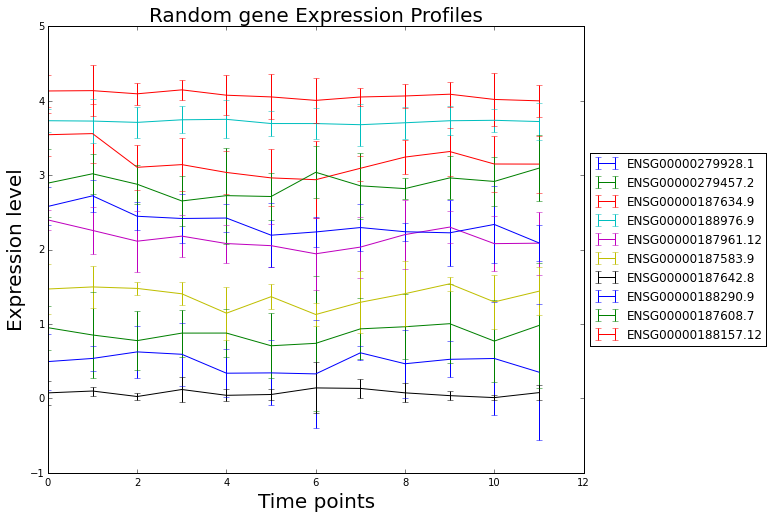

[('ENSG00000107404.16', 'ENSG00000142676.11'), ('ENSG00000160072.18', 'ENSG00000116685.14'), ('ENSG00000067606.14', 'ENSG00000040487.11'), ('ENSG00000162585.15', 'ENSG00000008130.14')]
ENSG00000107404.16 ENSG00000142676.11
ENSG00000160072.18 ENSG00000116685.14
ENSG00000067606.14 ENSG00000040487.11
ENSG00000162585.15 ENSG00000008130.14


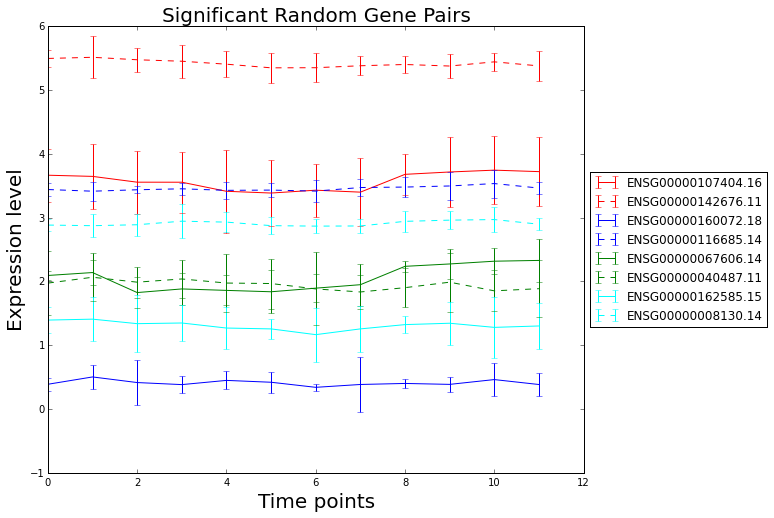

1312


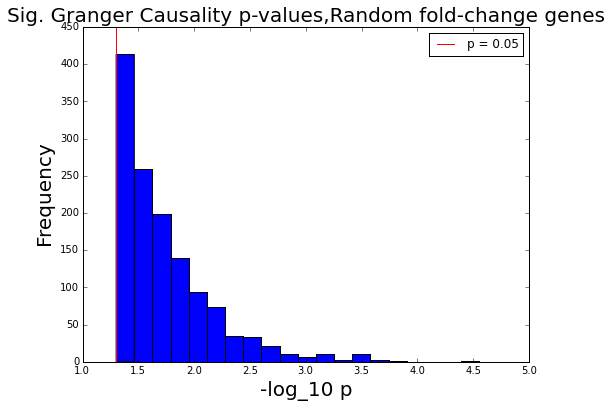

In [39]:

# Plot the typical genes
gene_name = "Random"
typical_genes = found_genes[0:10]

gtm.plot_genes(data, typical_genes, title= gene_name + " gene Expression Profiles")


# Plot some of the matched, significant pairs
plot_sig_matr = all_sig_matr & (p_matr < 0.001)
gene_pairs = gtm.get_sig_gene_pairs(plot_sig_matr, found_genes)
plot_gene_pairs = gene_pairs[1:5]
print plot_gene_pairs
gtm.plot_gene_pairs(data, plot_gene_pairs, title="Significant " +gene_name + " Gene Pairs")

# Plot the p-matrix


sig_pvalues = p_matr[np.where(all_sig_matr)]
print len(sig_pvalues)


plt.figure(figsize=(8,6))
plt.hist(-1 * np.log10(sig_pvalues), bins=20)
plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
plt.xlabel("-log_10 p", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.legend()
plt.title("Sig. Granger Causality p-values," + gene_name + " genes", fontsize=20)
plt.show()


# Get the variance of the timepoints and timepoints' fold changes

In [40]:
for name, data in zip(names, datas):
    print name
    print data[keys].describe()

Protein_TPM
                t00           t05           t1_           t2_           t3_  \
count  17692.000000  17692.000000  17692.000000  17692.000000  17692.000000   
mean       2.192417      2.206402      2.178838      2.169574      2.182784   
std        1.826552      1.835373      1.832324      1.819849      1.827020   
min       -0.059534     -0.091543     -0.135166     -0.281244     -0.101216   
25%        0.197965      0.203846      0.186751      0.191232      0.197324   
50%        2.241179      2.253568      2.198932      2.203505      2.201767   
75%        3.649917      3.667254      3.636455      3.600677      3.628082   
max       10.132579     10.096118     10.167736     10.119083     10.129553   

                t4_           t5_           t6_           t7_           t8_  \
count  17692.000000  17692.000000  17692.000000  17692.000000  17692.000000   
mean       2.174350      2.171380      2.170822      2.186971      2.183821   
std        1.824374      1.832141      

# Look at fold keys

In [41]:
data[fold_keys].describe()

t00-t05 fold  t05-t1_ fold  t1_-t2_ fold  t2_-t3_ fold  t3_-t4_ fold  \
count  17692.000000  17692.000000  17692.000000  17692.000000  17692.000000   
mean       2.218727      0.406070     -0.120292      0.996112      1.032958   
std       83.393820     34.363273    116.153438      7.595481     33.252099   
min    -2191.872463  -4138.659320 -15268.540025   -460.883246  -2634.086620   
25%        0.983731      0.900906      0.947725      0.965263      0.964985   
50%        1.005766      0.983272      0.990190      1.002796      0.995387   
75%        1.022845      1.010163      1.030102      1.027967      1.009790   
max    10048.031004    571.291141    941.608792    495.477977   1526.235037   

       t4_-t5_ fold  t5_-t6_ fold  t6_-t7_ fold  t7_-t8_ fold  t8_-t10_ fold  \
count  17692.000000  17692.000000  17692.000000  17692.000000   17692.000000   
mean       0.714909      1.678822      0.159764      0.458821       1.483610   
std       21.350038     83.498542     74.980641     79.467522      42.673553   
min    -1779.235672  -1819.887078  -9760.607757  -7216.073511   -1910.385201   
25%        0.938104      0.959866      0.958523      0.973497       0.937147   
50%        0.996047      0.995481      1.001318      0.997756       0.995214   
75%        1.022330      1.022482      1.040670      1.025574       1.019676   
max      662.251057  10205.487938    729.023093   1590.171361    4463.298358   

       t10_-t12_ fold  
count    17692.000000  
mean         1.126495  
std         19.771009  
min       -285.912925  
25%          0.962709  
50%          0.998103  
75%          1.020363  
max       2292.694883

# get the genes with the highest fold changes. Top 0.1% at each point
# apply granger then

In [42]:

change_indices = (data[fold_keys] > data[fold_keys].quantile(.999)).T.any() | (data[fold_keys] < data[fold_keys].quantile(.001)).T.any() 
change_genes = data['gene'][change_indices]

found_genes, geneTS = gtm.get_gene_TS(data, change_genes)
print len(found_genes)

384


[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(383, 373), (383, 374), (383, 375), (383, 376), (383, 377), (383, 378), (383, 379), (383, 380), (383, 381), (383, 382)]
time to partition inputs  0.00226902961731
Time to prepare function args  0.000211000442505
Process  17308 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56
Pool initialized at  17:07:55
Mapping begun at  17:07:55


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17309 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56
Process  17310 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17311 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17312 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17313 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17314 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56
Process  17315 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17316 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17317 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56
Process  17318 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56
Process  17319 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17320 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56
Process  17321 number  13 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17322 number  14 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56
Process  17323 number  15 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:07:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17308 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:09:05
Process  17310 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:09:05
Process  17309 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:09:05
Process  17315 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:09:05
Process  17314 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:09:05
Process  17313 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:09:05
Process  17318 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:09:05
Process  17317 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:09:05
Process

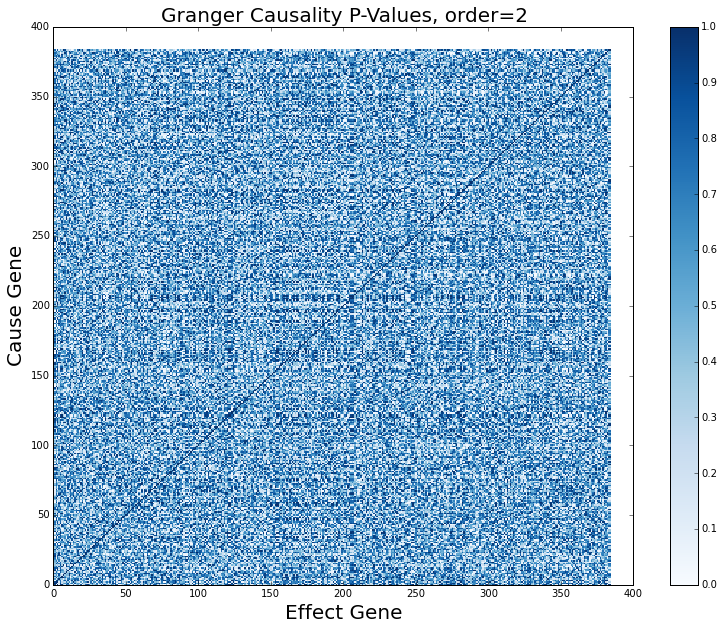

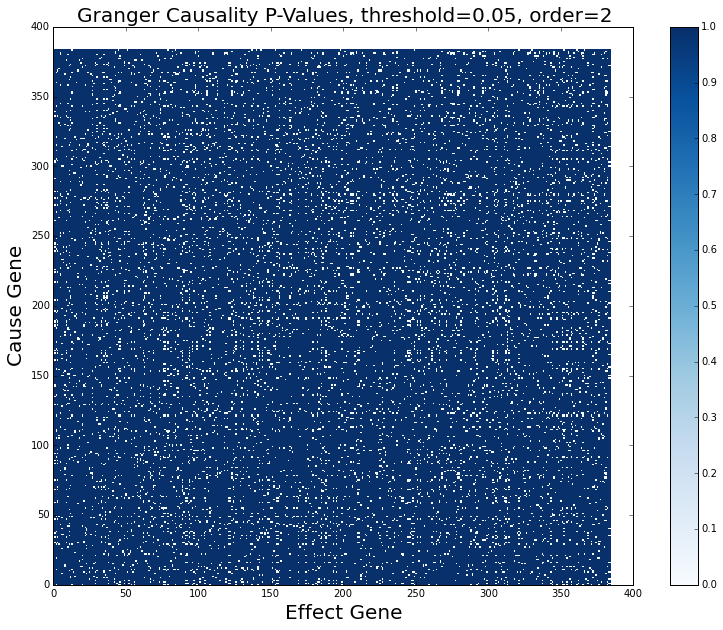

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(383, 373), (383, 374), (383, 375), (383, 376), (383, 377), (383, 378), (383, 379), (383, 380), (383, 381), (383, 382)]
time to partition inputs  0.00241804122925
Time to prepare function args  0.000110864639282
Process  17326 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21
Pool initialized at  17:09:21
Mapping begun at  17:09:21


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17327 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17328 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17329 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21
Process  17330 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17331 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17333 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17332 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17334 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17335 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21
Process  17336 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17337 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21
Process  17338 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17339 number  13 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:21
Process  17340 number  14 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:22


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17341 number  15 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:09:22


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17326 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:10:37
Process  17327 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:10:37
Process  17331 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:10:37
Process  17330 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:10:37
Process  17332 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:10:37
Process  17328 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:10:37
Process  17334 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:10:37
Process  17337 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:10:37
Process

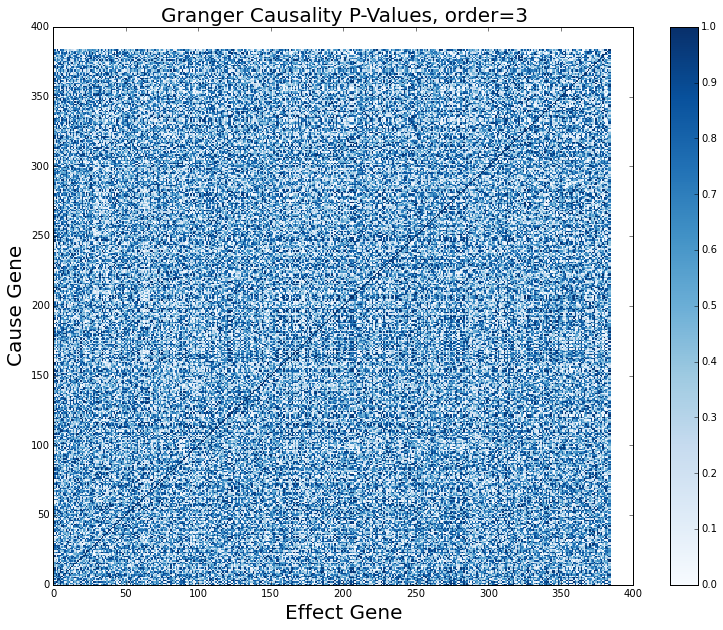

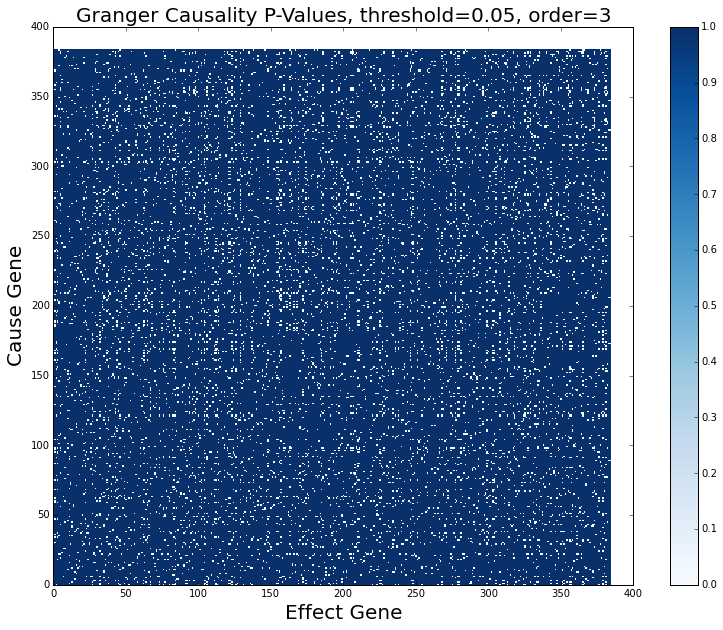

Total number of significant pairs  16039
Pairs significant across all matrices  2662 0.165970447035


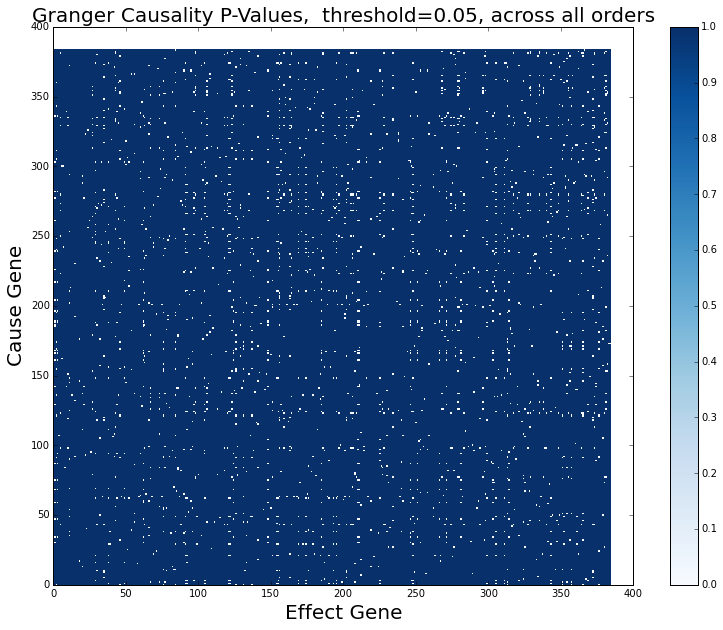

In [43]:
threshold = 0.05

sig_matr_list = []



for p in range(2,4):


    %time p_matr = ct.pairwise_granger_causality_all(geneTS, model_order=p, use_processes=True, procnum=16)

    sig_matr = p_matr < threshold
    
    sig_matr_list.append(sig_matr)
    
    print "P-values at p = ", p
    print p_matr
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(p_matr , cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

    
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(1 - sig_matr, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, threshold=" + str(threshold) + ", order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

print "Total number of significant pairs ", all_sig_num + not_sig_num
print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)


plt.figure(figsize=(13,10))
heatmap = plt.pcolor(1 - all_sig_matr, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Granger Causality P-Values,  threshold=" + str(threshold) + ", across all orders", fontsize=20)
plt.xlabel("Effect Gene", fontsize=20)
plt.ylabel("Cause Gene", fontsize=20)
plt.show()

# print this out in an understandable format: write causes, effects, and p-values to a file?

# get sig p-values

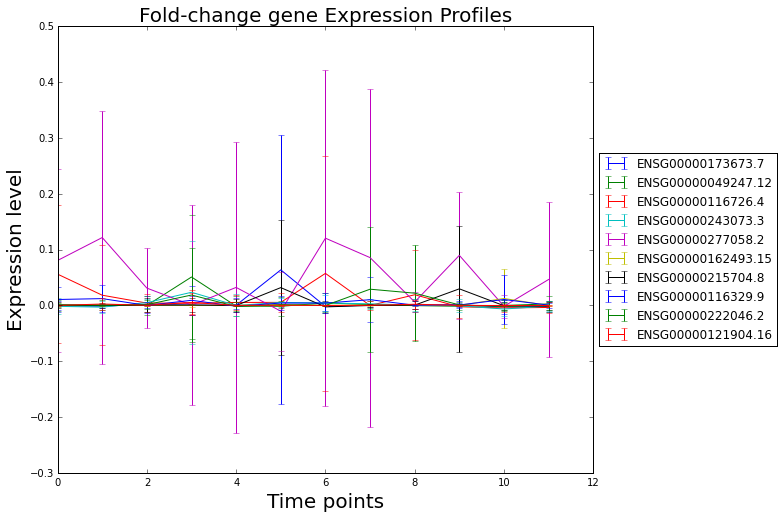

[('ENSG00000163154.5', 'ENSG00000185303.14'), ('ENSG00000175928.5', 'ENSG00000186766.7'), ('ENSG00000279068.1', 'ENSG00000002726.18')]
ENSG00000163154.5 ENSG00000185303.14
ENSG00000175928.5 ENSG00000186766.7
ENSG00000279068.1 ENSG00000002726.18


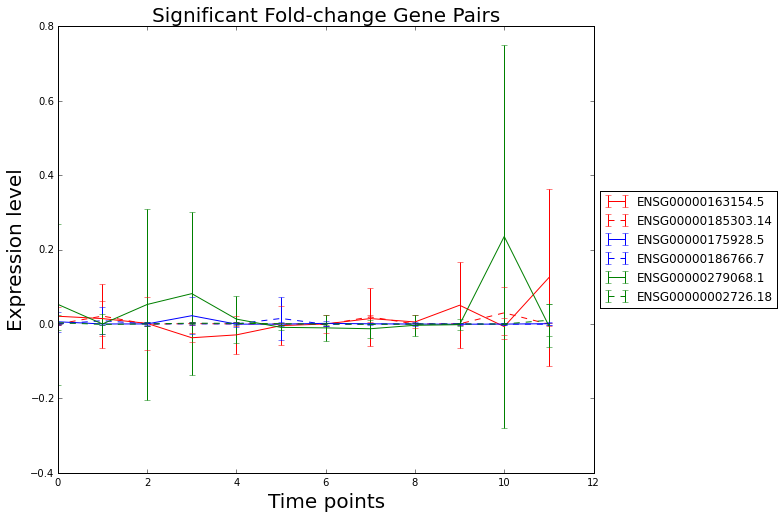

2662


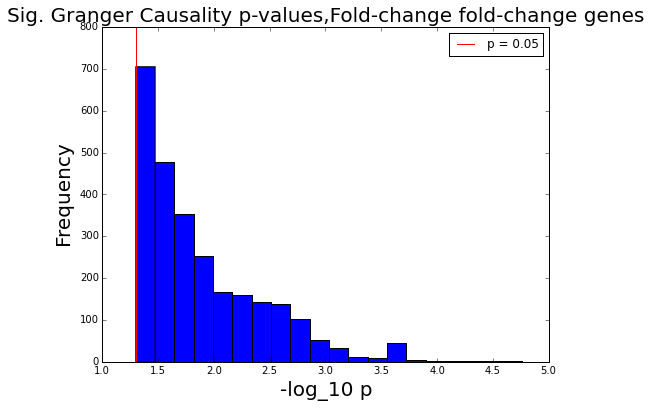

In [54]:
gene_name = "Fold-change"
typical_genes = found_genes[0:10]

gtm.plot_genes(data, typical_genes, title= gene_name + " gene Expression Profiles")


# Plot some of the matched, significant pairs
plot_sig_matr = all_sig_matr & (p_matr < 0.0001)
gene_pairs = gtm.get_sig_gene_pairs(plot_sig_matr, found_genes)
plot_gene_pairs = gene_pairs[1:4]
print plot_gene_pairs
gtm.plot_gene_pairs(data, plot_gene_pairs, title="Significant " +gene_name + " Gene Pairs")

# Plot the p-matrix


sig_pvalues = p_matr[np.where(all_sig_matr)]
print len(sig_pvalues)


plt.figure(figsize=(8,6))
plt.hist(-1 * np.log10(sig_pvalues), bins=20)
plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
plt.xlabel("-log_10 p", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.legend()
plt.title("Sig. Granger Causality p-values," + gene_name + " genes", fontsize=20)
plt.show()

# Multi-fold change genes

In [55]:
data[fold_keys].describe()

t00-t05 fold  t05-t1_ fold  t1_-t2_ fold  t2_-t3_ fold  t3_-t4_ fold  \
count  17692.000000  17692.000000  17692.000000  17692.000000  17692.000000   
mean       2.218727      0.406070     -0.120292      0.996112      1.032958   
std       83.393820     34.363273    116.153438      7.595481     33.252099   
min    -2191.872463  -4138.659320 -15268.540025   -460.883246  -2634.086620   
25%        0.983731      0.900906      0.947725      0.965263      0.964985   
50%        1.005766      0.983272      0.990190      1.002796      0.995387   
75%        1.022845      1.010163      1.030102      1.027967      1.009790   
max    10048.031004    571.291141    941.608792    495.477977   1526.235037   

       t4_-t5_ fold  t5_-t6_ fold  t6_-t7_ fold  t7_-t8_ fold  t8_-t10_ fold  \
count  17692.000000  17692.000000  17692.000000  17692.000000   17692.000000   
mean       0.714909      1.678822      0.159764      0.458821       1.483610   
std       21.350038     83.498542     74.980641     79.467522      42.673553   
min    -1779.235672  -1819.887078  -9760.607757  -7216.073511   -1910.385201   
25%        0.938104      0.959866      0.958523      0.973497       0.937147   
50%        0.996047      0.995481      1.001318      0.997756       0.995214   
75%        1.022330      1.022482      1.040670      1.025574       1.019676   
max      662.251057  10205.487938    729.023093   1590.171361    4463.298358   

       t10_-t12_ fold  
count    17692.000000  
mean         1.126495  
std         19.771009  
min       -285.912925  
25%          0.962709  
50%          0.998103  
75%          1.020363  
max       2292.694883

In [56]:
import os
most_change_indices = (data[fold_keys] > data[fold_keys].quantile(.95)).T.sum() + (data[fold_keys] < data[fold_keys].quantile(.05)).T.sum()
print (data[fold_keys] > data[fold_keys].quantile(.95)).T.sum().describe()
print (data[fold_keys] < data[fold_keys].quantile(.05)).T.sum().describe()
print len(np.where(most_change_indices > 7)[0])
os.system("say 'We're finished here'")

count    17692.000000
mean         0.550249
std          1.076371
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
dtype: float64
count    17692.000000
mean         0.550192
std          1.382163
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
dtype: float64
269


512

In [57]:
most_change_genes = data['gene'][most_change_indices > 7]

found_genes, geneTS = gtm.get_gene_TS(data, most_change_genes)
print len(found_genes)

269


In [58]:
reload(plt)

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(268, 258), (268, 259), (268, 260), (268, 261), (268, 262), (268, 263), (268, 264), (268, 265), (268, 266), (268, 267)]
time to partition inputs  0.00288414955139
Time to prepare function args  0.000186920166016
Process  17369 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05
Process  17370 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05
Pool initialized at  17:17:05
Mapping begun at  17:17:05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17371 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05
Process  17372 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17374 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05
Process  17373 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17375 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17376 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17377 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17378 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17379 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05
Process  17380 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17382 number  13 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05
Process  17381 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17383 number  14 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05
Process  17384 number  15 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17371 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:17:41
Process  17370 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:17:41
Process  17369 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:17:41
Process  17375 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:17:41
Process  17376 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:17:41
Process  17378 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:17:41
Process  17379 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:17:41
Process  17374 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:17:41
Process

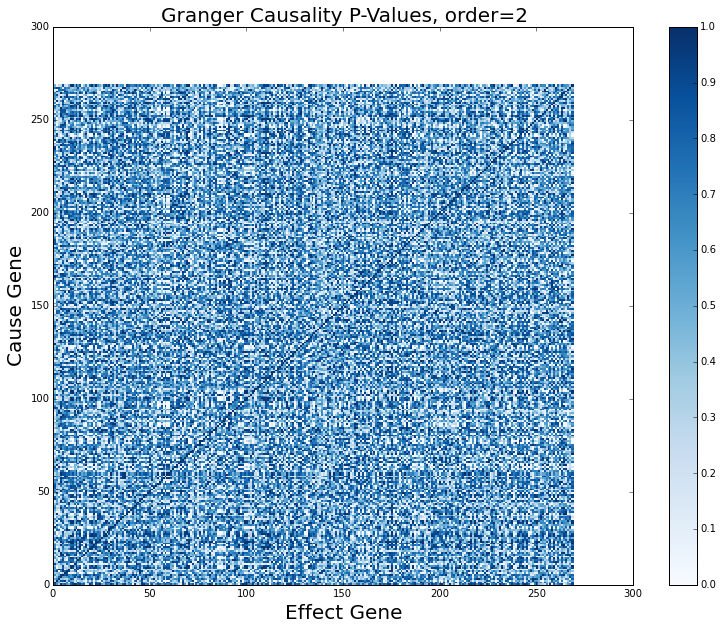

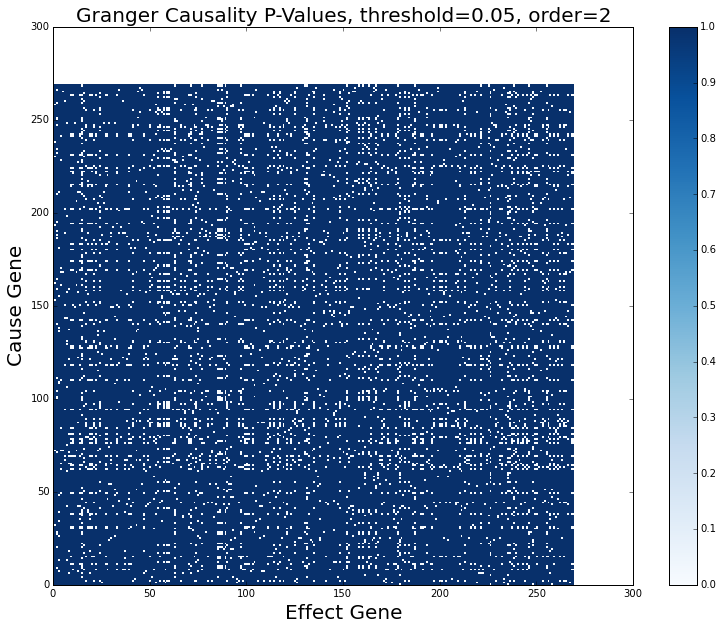

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(268, 258), (268, 259), (268, 260), (268, 261), (268, 262), (268, 263), (268, 264), (268, 265), (268, 266), (268, 267)]
time to partition inputs  0.000813961029053
Time to prepare function args  0.000102043151855
Process  17390 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53
Process  17387 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Pool initialized at  17:17:53
Mapping begun at  17:17:53
Process  17389 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53
Process  17386 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53
Process  17388 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17392 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17391 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53
Process  17393 number  7 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17394 number  8 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17395 number  9 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17396 number  10 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53
Process  17397 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53
Process  17398 number  12 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17399 number  13 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17400 number  14 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53
Process  17401 number  15 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  begun at  17:17:53


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17386 number  2 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:18:29
Process  17388 number  3 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:18:29
Process  17390 number  0 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:18:29
Process  17387 number  1 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:18:29
Process  17391 number  5 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:18:29
Process  17392 number  6 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:18:29
Process  17397 number  11 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:18:29
Process  17389 number  4 with function  <function pairwise_granger_causality_process at 0x1083cd0c8>  finished at  17:18:29
Process

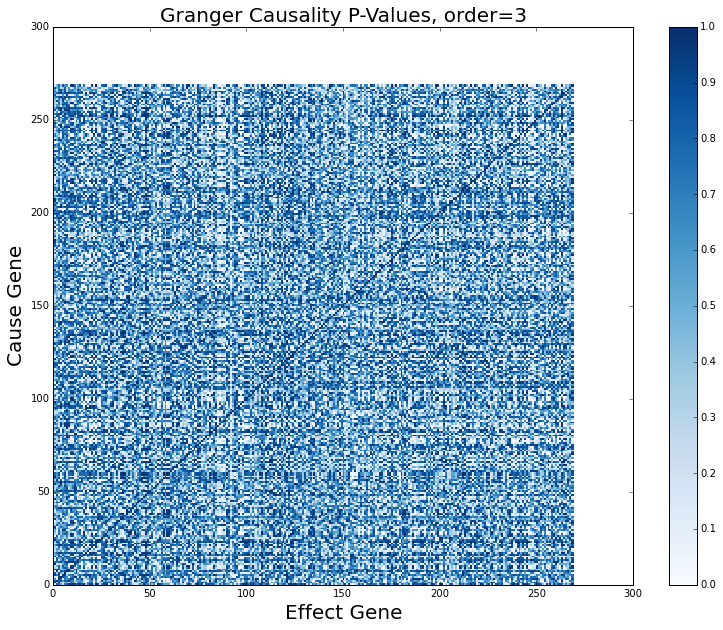

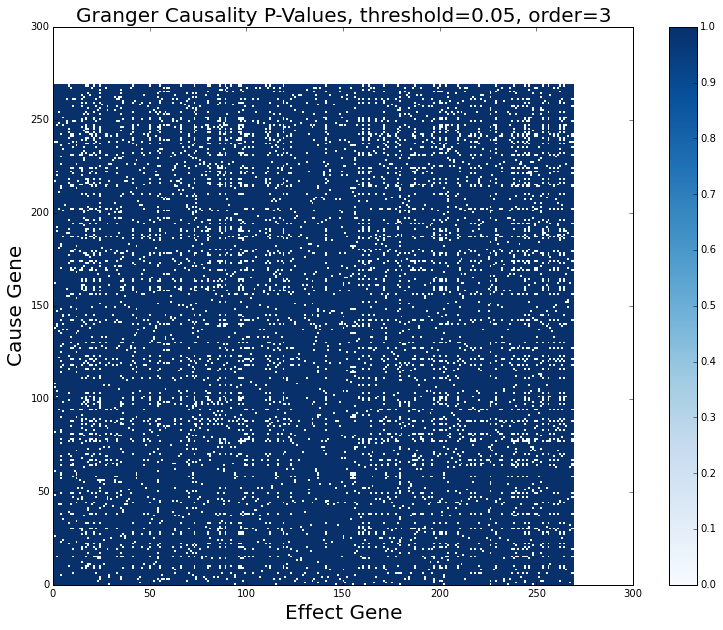

Total number of significant pairs  9638
Pairs significant across all matrices  2352 0.244034031957


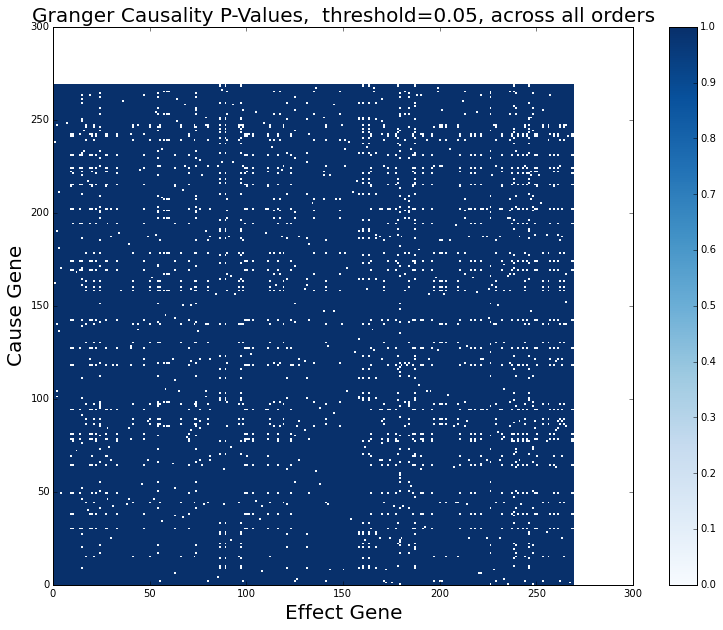

In [59]:
threshold = 0.05

sig_matr_list = []



for p in range(2,4):


    %time p_matr = ct.pairwise_granger_causality_all(geneTS, model_order=p, use_processes=True, procnum=16)

    print p_matr.shape
    sig_matr = p_matr < threshold
    
    sig_matr_list.append(sig_matr)
    
    print "P-values at p = ", p
    print p_matr
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(p_matr , cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

    
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(1 - sig_matr, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, threshold=" + str(threshold) + ", order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

print "Total number of significant pairs ", all_sig_num + not_sig_num
print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)


plt.figure(figsize=(13,10))
heatmap = plt.pcolor(1 - all_sig_matr, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Granger Causality P-Values,  threshold=" + str(threshold) + ", across all orders", fontsize=20)
plt.xlabel("Effect Gene", fontsize=20)
plt.ylabel("Cause Gene", fontsize=20)
plt.show()

# print this out in an understandable format: write causes, effects, and p-values to a file?

# get sig p-values

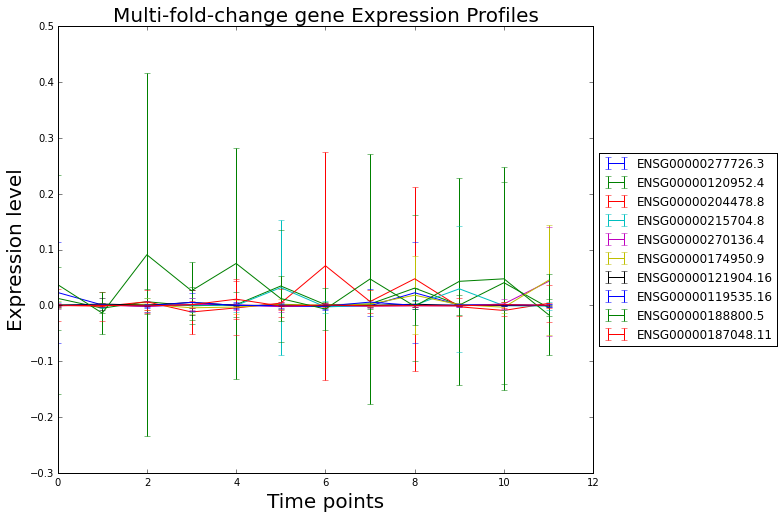

[('ENSG00000215704.8', 'ENSG00000204001.8'), ('ENSG00000187048.11', 'ENSG00000175899.13'), ('ENSG00000203811.1', 'ENSG00000277726.3'), ('ENSG00000225556.1', 'ENSG00000175899.13')]
ENSG00000215704.8 ENSG00000204001.8
ENSG00000187048.11 ENSG00000175899.13
ENSG00000203811.1 ENSG00000277726.3
ENSG00000225556.1 ENSG00000175899.13


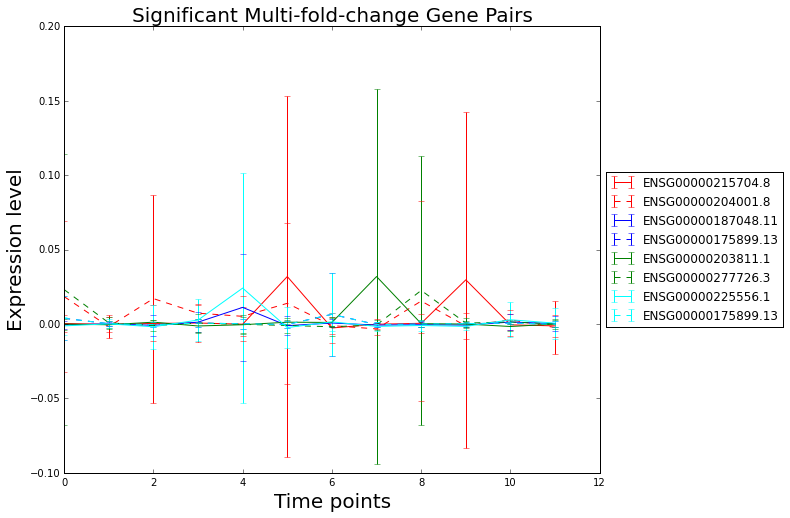

2352


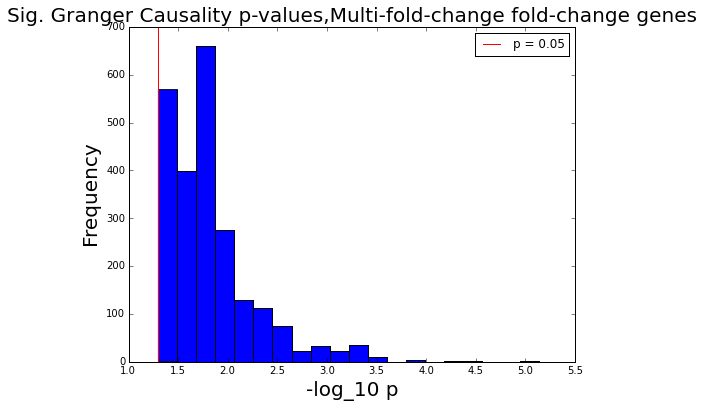

In [60]:
gene_name = "Multi-fold-change"
typical_genes = found_genes[0:10]

gtm.plot_genes(data, typical_genes, title= gene_name + " gene Expression Profiles")


# Plot some of the matched, significant pairs
plot_sig_matr = all_sig_matr & (p_matr < 0.0001)
gene_pairs = gtm.get_sig_gene_pairs(plot_sig_matr, found_genes)
plot_gene_pairs = gene_pairs[0:4]
print plot_gene_pairs
gtm.plot_gene_pairs(data, plot_gene_pairs, title="Significant " +gene_name + " Gene Pairs")

# Plot the p-matrix


sig_pvalues = p_matr[np.where(all_sig_matr)]
print len(sig_pvalues)


plt.figure(figsize=(8,6))
plt.hist(-1 * np.log10(sig_pvalues), bins=20)
plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
plt.xlabel("-log_10 p", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.legend()
plt.title("Sig. Granger Causality p-values," + gene_name + " genes", fontsize=20)
plt.show()

# Plot Basic Distributions
# Plot a few important gene TSs as well

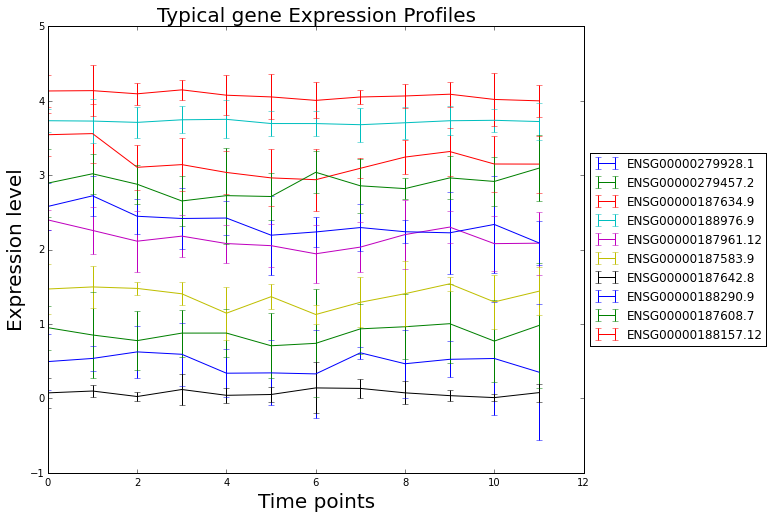

384


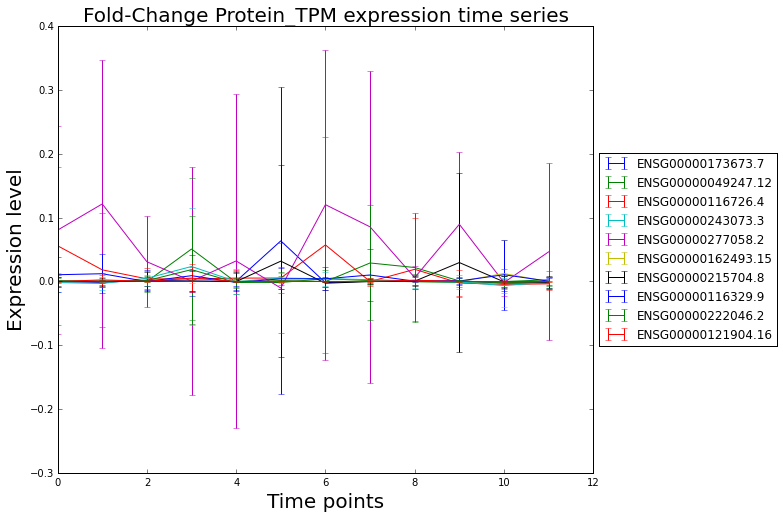

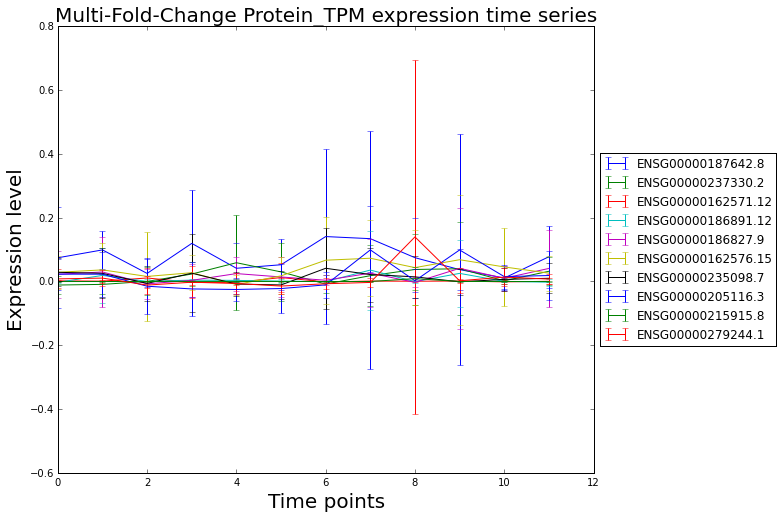

In [58]:
reload(gtm)

typical_genes = data['gene'][0:10]

gtm.plot_genes(data, typical_genes, title="Typical gene Expression Profiles")





change_indices = (data[fold_keys] > data[fold_keys].quantile(.999)).T.any() | (data[fold_keys] < data[fold_keys].quantile(.001)).T.any() 
change_genes = data['gene'][change_indices]

found_genes, geneTS = gtm.get_gene_TS(data, change_genes)
print len(found_genes)

plot_genes = found_genes[0:10]

gtm.plot_genes(data, plot_genes, title="Fold-Change " + name + " expression time series")


most_change_indices = (data[fold_keys] > data[fold_keys].quantile(.90)).T.sum() + (data[fold_keys] < data[fold_keys].quantile(.1)).T.sum()
most_change_threshold = 5
most_change_genes = data['gene'][most_change_indices > most_change_threshold]

plot_genes = most_change_genes[0:10]

gtm.plot_genes(data, plot_genes, title="Multi-Fold-Change " + name + " expression time series")



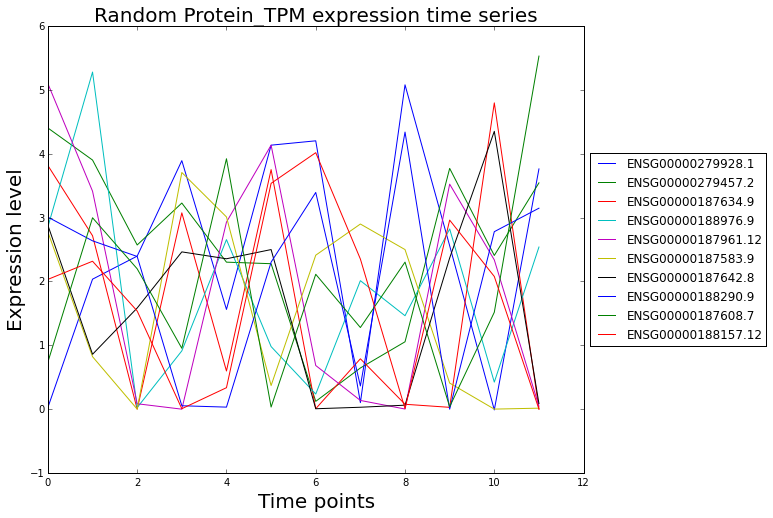

In [59]:
rand_dict = {}
for i in range(len(keys)):
    rand_dict[keys[i]] = rand_geneTS[:, i]
    

    
rand_df = pd.DataFrame(rand_dict)

rand_df['gene'] = data['gene'][0:400]
plot_genes = rand_df['gene'][0:10]

gtm.plot_genes(rand_df, plot_genes, title="Random " + name + " expression time series")



In [27]:
reload(gtm)

<module 'geneTSmunging' from 'geneTSmunging.py'>

# Some collected data on NCRNA

At p = 0.05: 
Original GGR has 33 significant pairs across model order 2 and model order 3, over2500 tested.
In simulated, we ~17 significant pairs across model orders 2 and 3.

Typically around 10 % of pairs between model orders 2 and 3 are equally significant.

0 pairs are significant across both at 0.01.

How to determine whether one is significant or not?


Total number of significant pairs  17632
Pairs significant across all matrices  1733 0.0982872050817

For randomized:

Total number of significant pairs 13316
Pairs significant across all matrices  1229 0.0922949834785

Total significant (13316, 13422, 13647)
All significant (1229, 1263, 1312)

In [29]:
print "Mean number of sig pairs is ", np.mean(all_sigs)
print "Highest sig pairs, ", np.max(all_sigs), "lowest sig pairs", np.min(all_sigs)

Mean number of sig pairs is  17.4
Highest sig pairs,  23 lowest sig pairs 12


# need to be able to start several processes that each write to the same matrix
# need to be able to submit a job that auto gets processes
# have script w/ # processes